# Minería de Datos: Trabajo Final:

### Importación de las librerías necesarias:

In [1]:
# Importación de bibliotecas estándar
import random
import warnings

# Importación de bibliotecas científicas y de visualización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de matplotlib para interactividad
plt.ion()  # Mantén la interactividad de matplotlib

# Configuración de la visualización de diagramas de sklearn
from sklearn import set_config
set_config(display="diagram")

# Importación de herramientas de preprocesamiento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, PolynomialFeatures, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
import category_encoders as ce
from sklearn.decomposition import PCA

# Importación de herramientas de selección de características
from sklearn.feature_selection import SelectKBest, f_classif, SelectPercentile, RFE, RFECV, SequentialFeatureSelector

# Importación de clasificadores
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,
    GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Importación de herramientas de evaluación y modelado
from sklearn import neighbors, model_selection, metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin

# Importación de técnicas de remuestreo de imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import (
    EditedNearestNeighbours, RepeatedEditedNearestNeighbours, 
    AllKNN, TomekLinks, RandomUnderSampler, NearMiss
)
from imblearn.combine import SMOTEENN, SMOTETomek

# Importación de herramientas evolutivas de DEAP
from deap import base, creator, tools, algorithms

# Supresión de warnings
warnings.filterwarnings('ignore')

## 1. Carga de datos:

Leemos los datos:

In [2]:
data_path = 'data/data.csv'
data = pd.read_csv(data_path, index_col=0, na_values=["NA", "?", "null", "n/a", "", " "])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Análisis de datos:

### 2.1. Análisis de los tipos de datos y detección de nulos:

In [3]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Verificamos a ver si hay valores nulos, vacíos o espacios:

In [4]:
# Verificar la cantidad de valores nulos (NaN) en cada columna
conteo_nulos = data.isnull().sum()
print("\nConteo de valores nulos:")
print(conteo_nulos)


Conteo de valores nulos:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Podemos obsercar que la variable TotalCharges tiene 11 valores nulos.

### 2.2. Distribución de las clases:

Analizamos la distribución de las clases de salida:

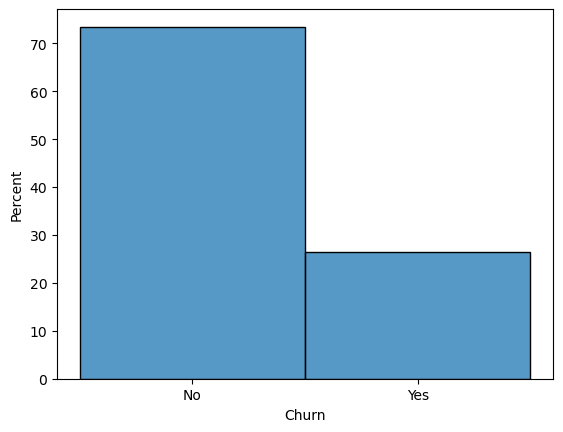

In [5]:
sns.histplot(data=data.loc[:, "Churn"], bins=2, stat='percent', discrete=True)
plt.show()

Podemos observar que se trata de un problema de clasificación desbalanceado.

### 2.2. Generación de variables:

La generación de variables es una técnica clave en el análisis de datos, ya que permite crear nuevas características a partir de las variables originales. Estas nuevas variables pueden ayudarnos a descubrir patrones relevantes que no son evidentes en la base de datos original, y pueden mejorar significativamente el rendimiento de los modelos predictivos o facilitar la interpretación del comportamiento de los clientes según el problema que estemos abordando.

Para ello, generaremos las siguientes variables:

1. **NumServiciosContratados**  
   Cuenta del total de servicios activos por cliente.  
   _Variables base:_ `PhoneService`, `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`.

2. **NumServiciosDeSeguridad**  
   Suma de servicios relacionados con seguridad y soporte.  
   _Incluye:_ `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`.

3. **NumServiciosDeEntretenimiento**  
   Total de servicios de entretenimiento contratados.  
   _Variables:_ `StreamingTV` + `StreamingMovies`.

4. **AntigüedadAlta**  
   Binaria: `1` si `tenure` > 24, `0` si no.  
   Sirve para segmentar clientes nuevos vs fidelizados.

5. **GastoPromedioMensual**  
   Cálculo: `TotalCharges / tenure` (cuando `tenure > 0`).  
   Permite observar si el cliente ha tenido un comportamiento de gasto constante o variable.

6. **TieneDependientesYPartner**  
   Binaria: `1` si `Partner` y `Dependents` son "Yes", `0` si no.  
   Puede indicar mayor estabilidad o compromiso con el servicio.

Para poder crear estas variables, crearemos un componente que se encargue de añadirlas:

In [6]:
class GeneradorVariables(TransformerMixin):

    # Constructor de la clase
    def __init__(self, columns=None):
        self.columns = columns
    
    # Método fit
    def fit(self, X, y=None):
        return self

    # Método transform
    def transform(self, X):
        # Transformamos X a DataFrame por si llega un array de Numpy (para compatibilidad en la Pipeline)
        X = pd.DataFrame(X)
        # Creamos una copia del DataFrame X para no perder los datos originales
        X_aux = X.copy()

        # Obtenemos el número de servicios contratados
        servicios = ["PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", 
                     "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
        
        X_aux["NumServiciosContratados"] =  X[servicios].apply(lambda row: (row == "Yes").sum(), axis=1).astype(str)

        # Obtenemos el número de servicios de seguridad contratados
        servicios_seguridad = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
        X_aux["NumServiciosSeguridadContratados"] =  X[servicios_seguridad].apply(lambda row: (row == "Yes").sum(), axis=1).astype(str)

        # Obtenemos el número de servicios de entretenimiento contratados
        servicios_entretenimiento = ["StreamingTV", "StreamingMovies"]
        X_aux["NumServiciosEntretenimientoContratados"] =  X[servicios_entretenimiento].apply(lambda row: (row == "Yes").sum(), axis=1).astype(str)

        # Obtenemos si es un cliente antigüo
        X_aux["AntiguedadAlta"] = X["tenure"] > 24

        # Obtenemos el gasto promedio mensual
        X_aux["GastoPromedioMensual"] = np.where(
            X["tenure"] > 0,
            X["TotalCharges"] / X["tenure"],
            X["TotalCharges"]
        )

        # Obtenemos si tiene dependientes y pareja
        X_aux["TieneDependientesYPartner"] = (X["Dependents"] == "Yes") & (X["Partner"] == "Yes")

        # Devolvemos el DataFrame transformado
        return X_aux
    
    # Método para asignar los valores de los híper-parámetros y que, de este modo, 
        # podamos aplicar GridSearchCV sobre un objeto de esta clase
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    # Método para obtener los valores de los híper-parámetros que queramos del modelo (lo usa GridSearchCV al mostrar la mejor configuración)
    def get_params(self, deep=True):
        # Devolvemos los valores de los híper-parámetros del método de preparación de datos
        return {"columns": self.columns}

Generamos el dataset con las nuevas variables generadas:

In [7]:
generated_data = GeneradorVariables().transform(data)

Creamos varias listas de variables relevantes que nos ayudarán más adelante:

In [8]:
variables_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges', 'GastoPromedioMensual']

variables_categoricas_nominales = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
    "Contract", "PaperlessBilling", "PaymentMethod", 
    "AntiguedadAlta", "TieneDependientesYPartner"
]

variables_categoricas_ordinales = ['NumServiciosContratados', 'NumServiciosSeguridadContratados', 
    'NumServiciosEntretenimientoContratados']

variablesEntrada = variables_numericas + variables_categoricas_nominales + variables_categoricas_ordinales
variableSalida = "Churn"

### 2.3. Visualización de las distribuciones de las variables:

Visualizamos la distribución de las variables numéricas:

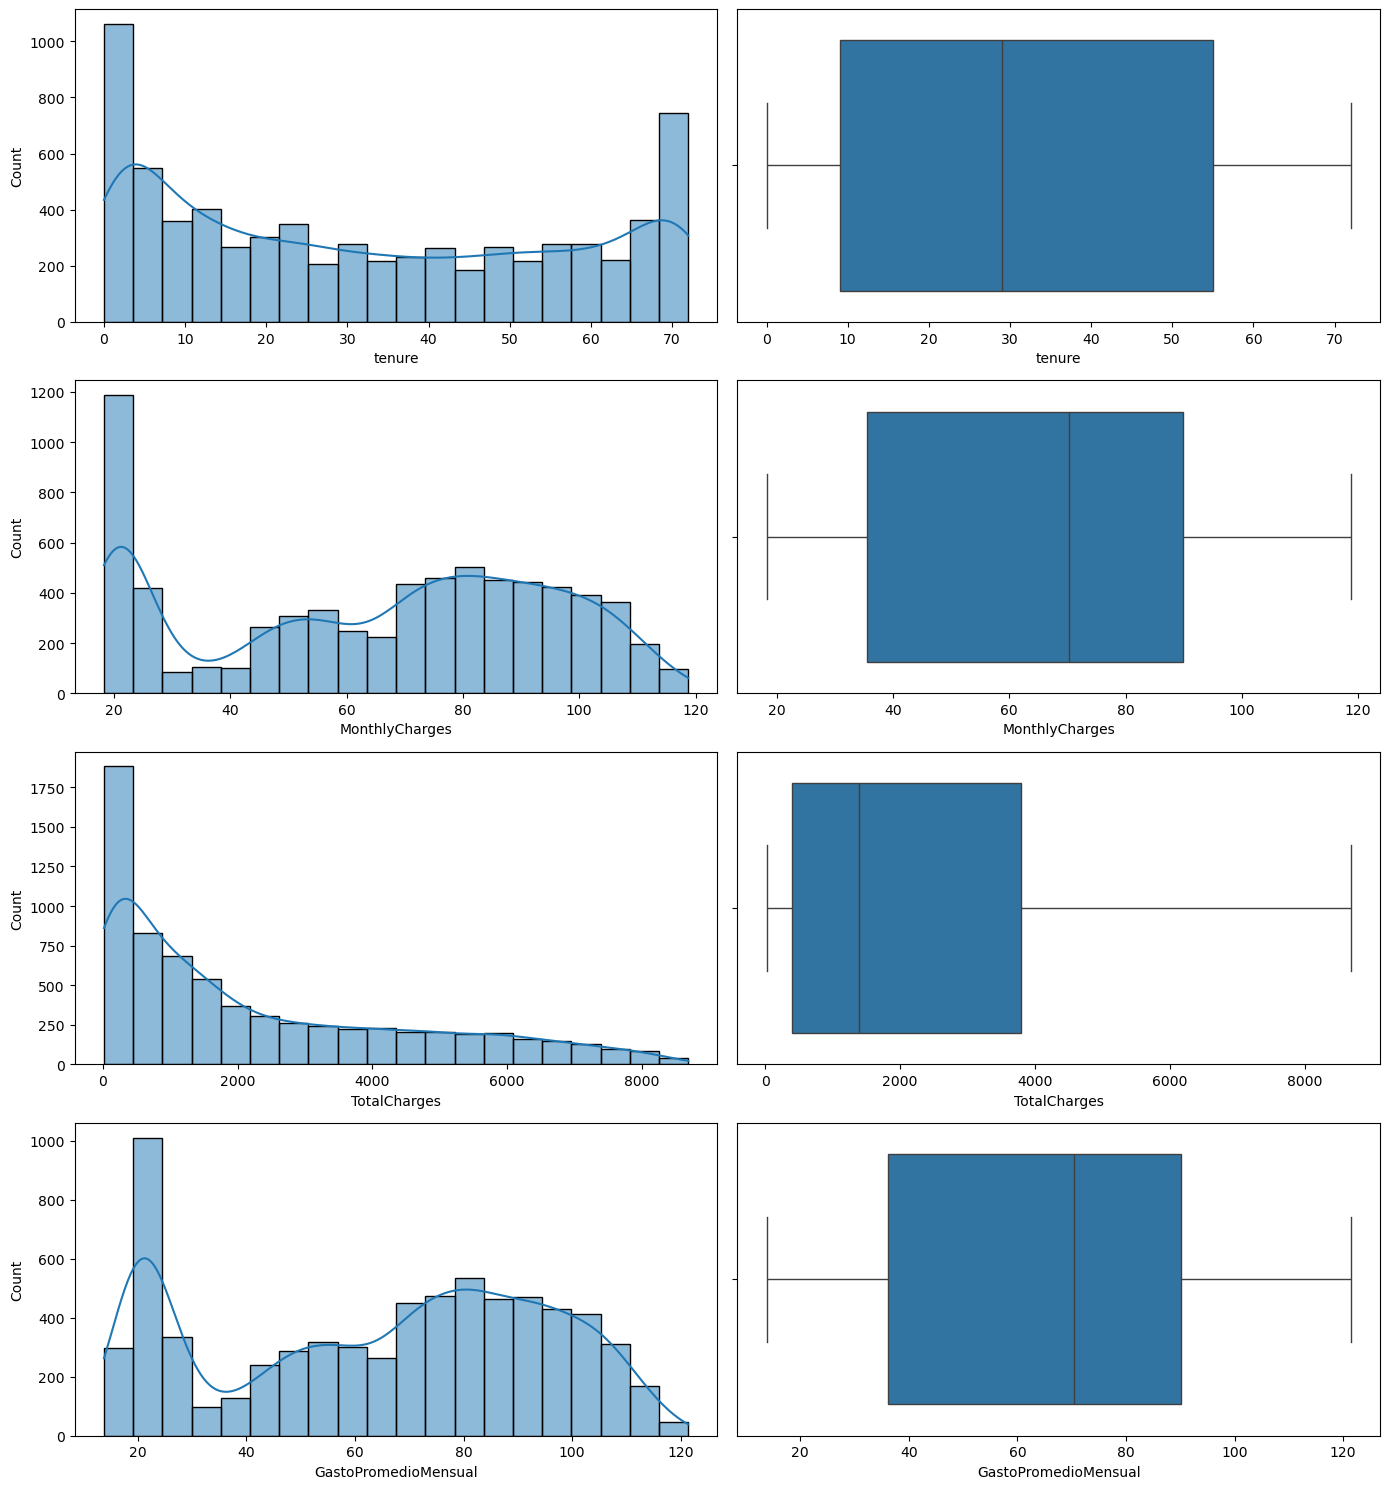

In [9]:
fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=2, figsize=(14, 15))

for i in range(len(variables_numericas)):
    sns.histplot(data=generated_data, x=variables_numericas[i], ax=axes[i, 0], bins=20, kde=True)
    sns.boxplot(data=generated_data, x=variables_numericas[i], ax=axes[i, 1])

fig.tight_layout()

Tenure: Picos en los extremos (muchos clientes nuevos y bastantes viejos). boxplot sin valores atipicos.

Monyhly charges: Un gran número de clientes con cargos bajos y una distribución dispersa en valores más altos. Boxplot con dispersion sin valores extremos.

Total charges: Mayoría valores bajos (En esta podríamos usar lo que hemos dado hoy en clase para cambiar distribución con la raiz o log). Boxplot muestra mucha dispersión y probablemente valores extremos.

Visualizamos la distribución de las variables categóricas:

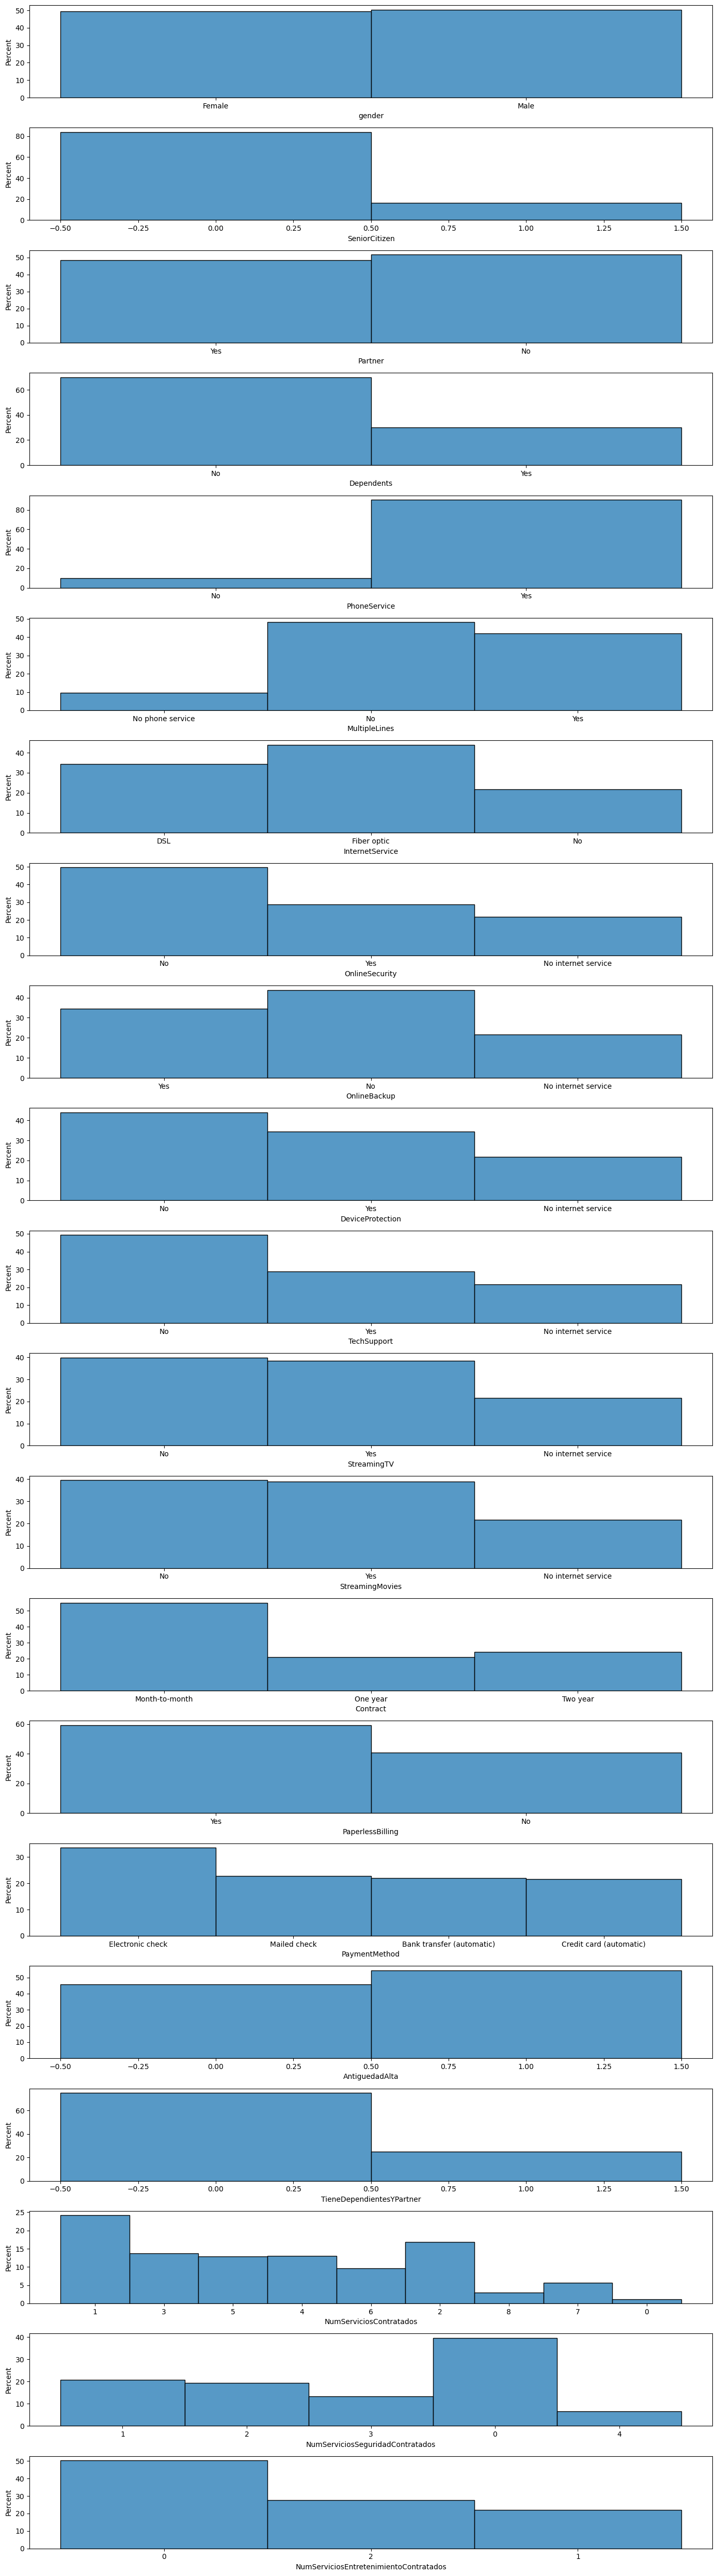

In [10]:
variables_categoricas = variables_categoricas_nominales + variables_categoricas_ordinales

fig, axes = plt.subplots(nrows=len(variables_categoricas), ncols=1, figsize=(14, 50))

for i in range(len(variables_categoricas)):
    sns.histplot(data=generated_data, x=variables_categoricas[i], stat='percent', discrete=True, ax=axes[i])

fig.tight_layout()

Gender: Equilibrado

Senior citizen: Desequlibrada (mayoria no son senior)

Partner: Equilibrada

Dependemts: Desequilibrada (mayoria no tienen)

Phonr service: Desequlibrada (mayoria tienen)

MultipleLines: Equilibrio entre no y si,pero desequilibrio con sin servicio

InternetService: 

OnlineSecurity/ OnlineBackup/ DeviceProtection/ TechSupport: En todas estas categorías, hay más 
clientes sin estos servicios que con ellos, y un segmento sin servicio de internet.

Streaming TV/ Streaming Movies: Distribución similar: hay más clientes sin estos servicios que con ellos, y algunos sin internet.

Contract: La mayoría de los clientes tienen contrato mensual.

PaperlessBilling:Ligeramente desbalanceada

PaymentMethod: Una clase con mas y tres menores balanceadas

### 2.4. Relación entre las variables de entrada y de salida:

Visualizamos la relación entre las variables numéricas y la salida:

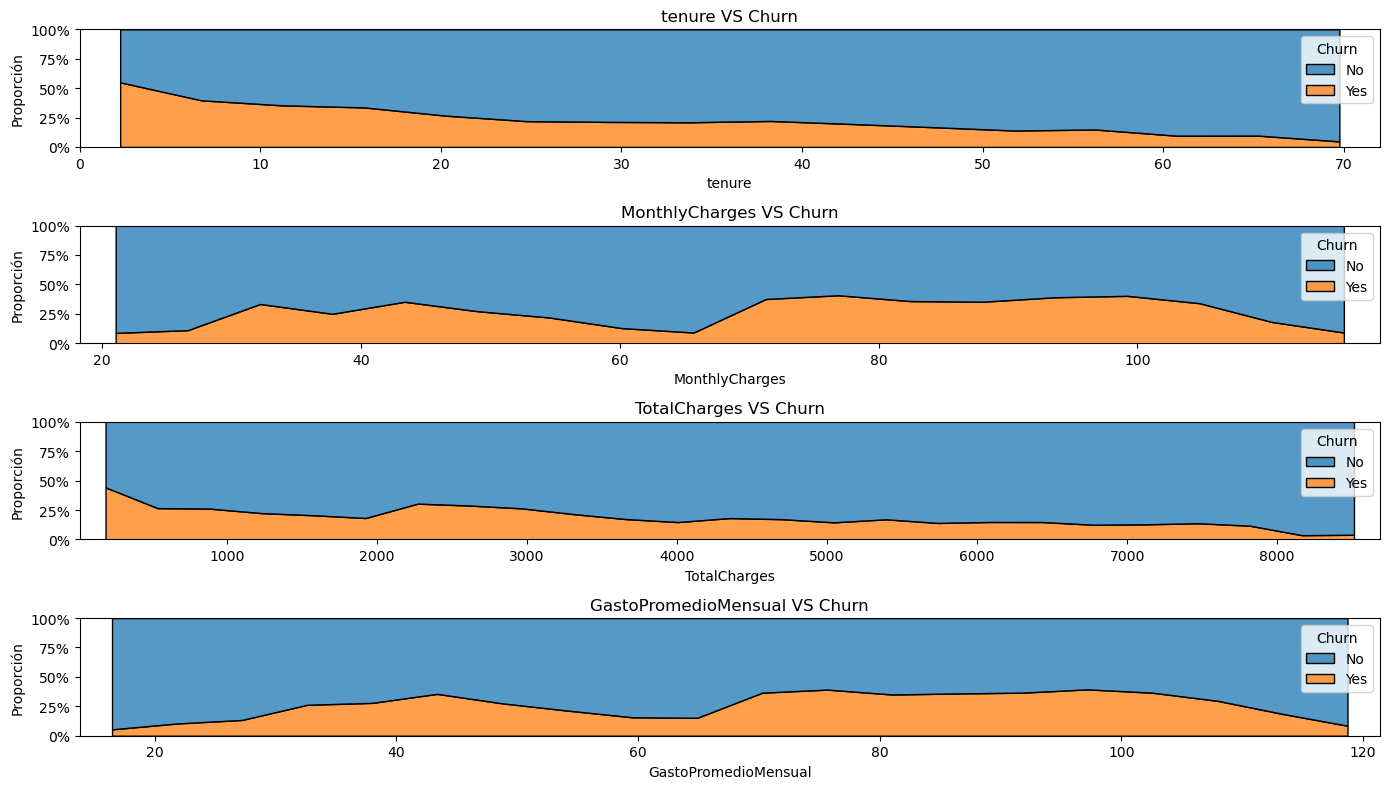

In [11]:
fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=1, figsize=(14, 8))

for i in range(len(variables_numericas)):
    sns.histplot(
        data=generated_data,
        x=variables_numericas[i],
        hue=variableSalida,
        ax=axes[i],
        element='poly',
        stat='probability',
        multiple='fill' 
    )
    axes[i].set_ylabel('Proporción')
    axes[i].set_title(f'{variables_numericas[i]} VS {variableSalida}')
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()
plt.show()


Visualizamos la relación entre las variables categóricas y la salida:

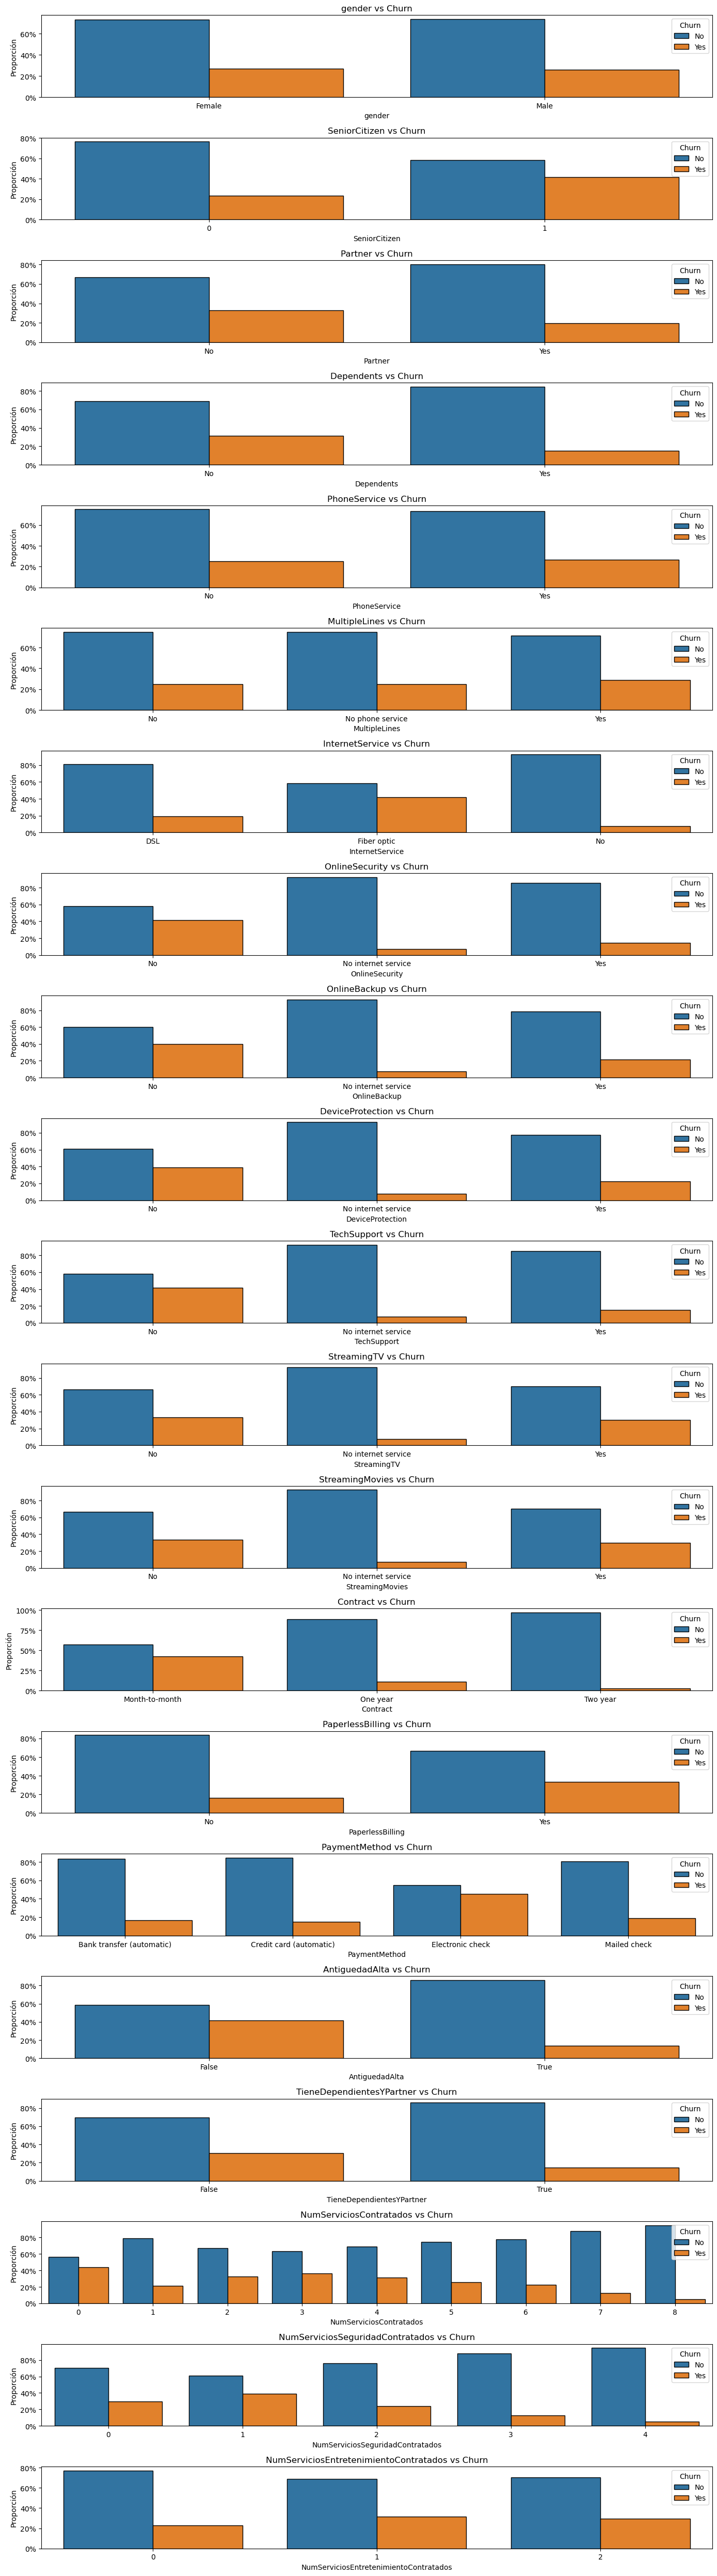

In [12]:
fig, axes = plt.subplots(nrows=len(variables_categoricas), ncols=1, figsize=(14, 50))

for i, var in enumerate(variables_categoricas):
    # Calculamos la proporción condicional P(clase | categoría)
    prop_df = (
        generated_data.groupby([var, variableSalida])
        .size()
        .reset_index(name='count')
    )

    # Normalizamos dentro de cada categoría
    prop_df['proportion'] = prop_df.groupby(var)['count'].transform(lambda x: x / x.sum())

    sns.barplot(
        data=prop_df,
        x=var,
        y='proportion',
        hue=variableSalida,
        ax=axes[i],
        edgecolor='black', 
        linewidth=1 
    )

    axes[i].set_ylabel('Proporción')
    axes[i].set_title(f'{var} vs {variableSalida}')
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()
plt.show()

1. **Género:** No parece haber una diferencia significativa en la tasa de churn entre hombres y mujeres.
2. **Senior Citizen:** Los clientes mayores (senior citizens) tienen una mayor proporción de churn en comparación con los más jóvenes.
3. **Partner (Pareja):** Los clientes sin pareja parecen tener una mayor tasa de churn que aquellos que tienen pareja.
4. **Dependents (Dependientes):** Los clientes sin dependientes tienen una mayor tasa de churn.
5. **Phone Service:** La mayoría de los clientes tienen servicio telefónico, pero no se observa una gran diferencia en churn entre los que lo tienen y los que no.
6. **Multiple Lines:** Los clientes con múltiples líneas parecen tener una tasa de churn mayor en comparación con los que tienen una sola línea o no tienen servicio telefónico.
7. **Internet Service:** La tasa de churn varía según el tipo de servicio de internet, donde los que tienen servicio de fibra óptica parecen tener una tasa de churn más alta en comparación con DSL y los que no tienen internet.
8. **Online Security y Online Backup:** Los clientes que no tienen estos servicios parecen tener una mayor tasa de churn.
9. **Device Protection y Tech Support:** Similar a los anteriores, los clientes sin estos servicios presentan mayor churn.
10. **Streaming TV y Streaming Movies:** No tener estos servicios parece estar asociado con una mayor tasa de churn.
11. **Contract:** Los clientes con contratos mensuales tienen una tasa de churn significativamente más alta en comparación con los que tienen contratos a uno o dos años.
12. **Paperless Billing:** Los clientes con facturación electrónica parecen tener mayor churn en comparación con los que reciben facturas físicas.
13. **Payment Method:** Los clientes que pagan con cheque electrónico tienen la mayor tasa de churn, mientras que los que usan tarjeta de crédito o transferencias bancarias automáticas tienen menor churn.

### Conclusión:
- **Factores que aumentan el churn:** Ser una persona mayor, no tener pareja o dependientes, usar pago con cheque electrónico, tener un contrato mensual, y no contar con servicios adicionales como soporte técnico o seguridad en línea.
- **Factores que reducen el churn:** Tener contratos más largos (uno o dos años), pagar automáticamente con tarjeta o transferencia, y suscribirse a servicios adicionales.


### 2.5. Relación entre variables numéricas:

Visualizamos las relaciones entre las variables numéricas:

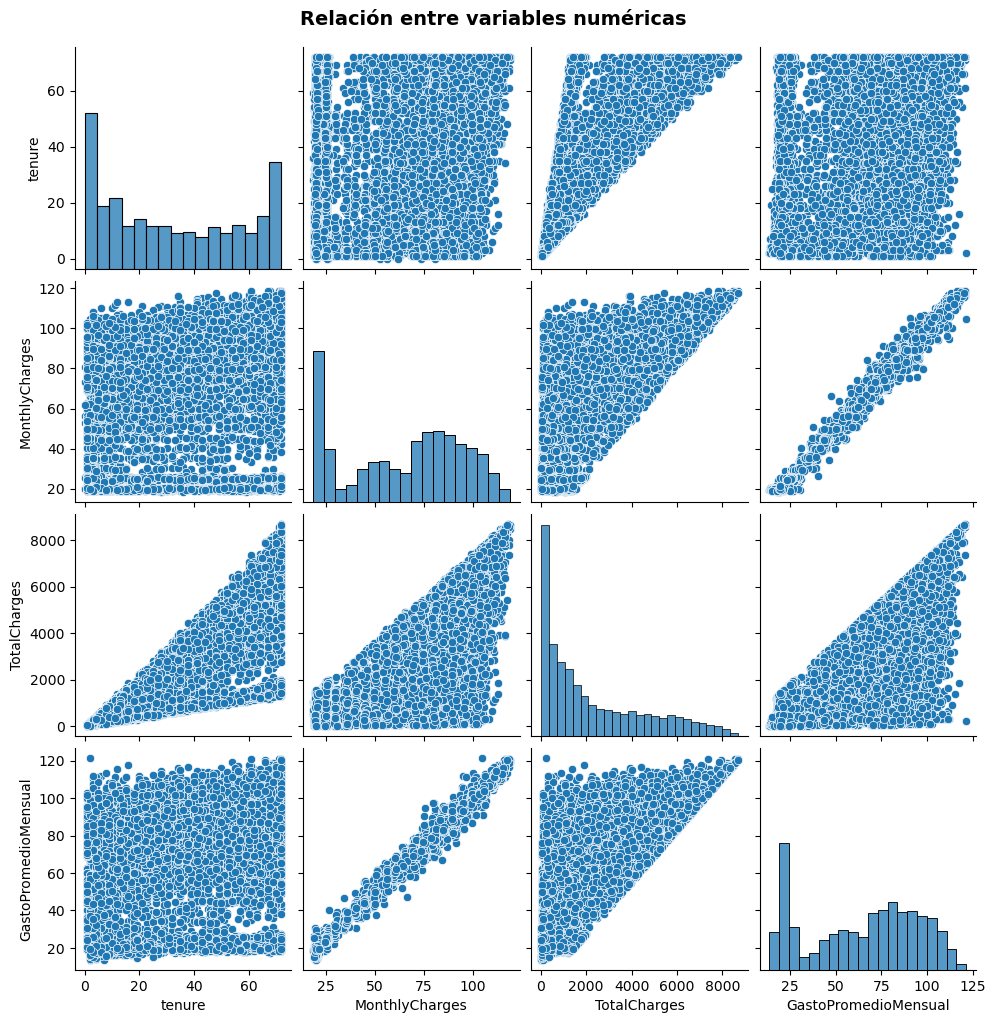

In [13]:
sns.pairplot(data=generated_data[variables_numericas], kind='scatter', diag_kind='hist', height=2.5)
plt.suptitle('Relación entre variables numéricas', y=1.02, fontsize=14, fontweight="bold")
plt.show()

1. **Distribuciones individuales:**
   - **Tenure:** Hay más clientes con poca antigüedad, lo que sugiere que muchas personas cancelan temprano o que hay un flujo constante de nuevos clientes.
   - **MonthlyCharges:** Presenta una distribución uniforme con valores entre aproximadamente 20 y 120.
   - **TotalCharges:** Tiene una distribución sesgada hacia la izquierda, con más clientes con cargos totales bajos (probablemente porque llevan poco tiempo en la empresa).

2. **Relaciones entre variables:**
   - **Tenure vs. MonthlyCharges:** No parece haber una correlación clara entre el tiempo de antigüedad y el monto de los cargos mensuales.
   - **Tenure vs. TotalCharges:** Existe una clara relación lineal positiva, lo cual tiene sentido porque mientras más tiempo un cliente permanezca, mayor será su cargo total.
   - **MonthlyCharges vs. TotalCharges:** También hay una correlación positiva, pero con más dispersión, ya que los cargos totales dependen tanto del monto mensual como de la duración del cliente.

### Conclusión:
- **Los clientes nuevos tienen cargos totales bajos, lo que es esperable.**
- **Los clientes con mayor tiempo tienen cargos totales más altos.**
- **No hay una relación clara entre la antigüedad del cliente y el monto de su cargo mensual.**



## 3. Modelo base

Para comenzar a analizar el efecto de las distintas técnicas de minería de datos en la mejora de las predicciones, es necesario establecer un modelo de referencia sobre el cual aplicar las mejoras posteriores.

El modelo base será lo más sencillo posible, utilizando únicamente el preprocesamiento mínimo necesario para permitir que los algoritmos de aprendizaje automático funcionen correctamente. De esta manera, podremos medir de forma clara el impacto de cada técnica adicional aplicada en fases posteriores.

A continuación analizaremos cual es el preprocesamiento mínimo para que un algoritmo de aprendizaje automático funcione con nuestro conjunto de datos.

### 3.1. Etiquetación de los datos:

Actualmente, las etiquetas de la variable objetivo están representadas como `'Yes'` y `'No'`. Para poder utilizar modelos de aprendizaje automático, necesitamos convertir estas etiquetas a valores numéricos. Aplicaremos la siguiente transformación:

- `'Yes'` → `1`
- `'No'` → `0`

Creamos el componente:

In [14]:
class EtiquetadorY(BaseEstimator, TransformerMixin):
    
    def fit(self, y, X=None):
        return self

    def transform(self, y):
        y_series = pd.Series(y)
        return y_series.map({'Yes': 1, 'No': 0}).values

    def fit_transform(self, y, X=None):
        return self.fit(y).transform(y)

### 3.1. Tratamiento de los valores nulos:

Como se ha mencionado anteriormente, hemos encontrado valores nulos en la variable "TotalCharges". Para que nuestro algoritmo de aprendizaje se pueda ejecutar, necesitamos tratar de alguna manera estos valores.

Como primera solución, utilizaremos un imputador por la media de la variable.

### 3.2. Transformación de variables: categórica a numérica:

En nuestro problema tenemos algunas variables categóricas. Estas deben ser convertidas a numéricas, ya que más adelante, cuando necesitemos aplicar un modelo de aprendizaje automático éstas no podrán ser tratadas. Como primera solución, comenzaremos utilizando la codificación ordinaria por su sencillez.


### 3.3. Modelo de Aprendizaje Automático:

Como modelo base para las pruebas utilizaremos K-Nearest Neighbours con sus valores por defecto.

### 3.4.  Pipelines de preprocesamiento:

Para aplicar el preprocesamiento de manera más sencilla y evitar errores que nos lleven a cometer Data Leakage, crearemos una Pipeline que se encargue de aplicar este preprocesamiento mencionado de manera adecuada.

Primero creamos la Pipeline que preprocesará las variables categóricas:

In [15]:
categorical_preprocessor = Pipeline(steps=[
    ('ordinal_encoder', ce.OrdinalEncoder())
])

Crearemos otra Pipeline que se encargue de preprocesar las variables numéricas con valores faltantes:

In [16]:
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

Creamos un ColumnTransformer que se encargue de transformar todas las variables:

In [17]:
# Creamos el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        # Codificamos las variables categóricas
        ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),

        # Imputamos valores en las variables con valores faltantes
        ('numerical_preprocessor', numerical_preprocessor, variables_numericas),
    ]
)

Para poder probar el preprocesador creado, primero debemos separar el dataset en las matrices X e y:

In [18]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y[y == "Yes"] = 1
y[y == "No"] = 0
y = y.astype(int)

In [19]:
X_modified = GeneradorVariables().transform(X)
X_modified = preprocessor.fit_transform(X_modified)

# Visualizamos los datos transformados
pd.DataFrame(X_modified).head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,0,1,1,1,1,1,1,1,1,...,1,False,False,1,1,1,1.0,29.85,29.85,29.85
1,2,0,2,1,2,2,1,2,2,2,...,2,True,False,2,2,1,34.0,56.95,1889.5,55.573529
2,2,0,2,1,2,2,1,2,1,1,...,2,False,False,2,2,1,2.0,53.85,108.15,54.075
3,2,0,2,1,1,1,1,2,2,2,...,3,True,False,2,3,1,45.0,42.3,1840.75,40.905556
4,1,0,2,1,2,2,2,1,2,1,...,1,False,False,1,4,1,2.0,70.7,151.65,75.825


### 3.5. Creación del modelo:

El modelo base consistirá en el preprocesador creado previamente, combinado con el generador de variables y un KNeighborsClassifier, tal y como se ha mencionado anteriormente. Para facilitar estos pasos, se creará una pipeline que ejecute todos los pasos secuencialmente.

In [20]:
modelo = Pipeline([
    ("var_generator", GeneradorVariables()),
    ("preprocessor", preprocessor),
    ("knn", neighbors.KNeighborsClassifier())
])

modelo

Pipeline(steps=[('var_generator',
                 <__main__.GeneradorVariables object at 0x165967650>),
                ('preprocessor',
                 ColumnTransformer(transformers=[('categorical_preprocessor',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'Devic...
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'AntiguedadAlta',
                                                   'TieneDependientesYPartner',
                                                   'NumServiciosContratados',
                                                   'NumServiciosSeguridadContratados',
                                                   'NumServiciosEntretenimientoContratados']),
                                                 ('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'GastoPromedioMensual'])])),
                ('knn', KNeighborsClassifier())])

Definimos una función que entrene el clasificador y devuelva el área bajo la curva (AUC) tanto para el conjunto de entrenamiento como para el de validación, además de la matriz de confusión.

In [21]:
def obtener_resultados(modelo, X_train, y_train, X_val, y_val):
    modelo.fit(X_train, y_train)
    # Calculamos el AUC PR en train
    y_train_prob = modelo.predict_proba(X_train)[:, 1]
    train_auc_pr = metrics.average_precision_score(y_train, y_train_prob) * 100
    # Calculamos el AUC PR en valiación
    y_val_prob = modelo.predict_proba(X_val)[:, 1]
    val_auc_pr = metrics.average_precision_score(y_val, y_val_prob) * 100

    # Calculamos la matriz de confusión en train
    y_train_pred = modelo.predict(X_train)
    cm_train = metrics.confusion_matrix(y_train, y_train_pred)
    # Calculamos la matriz de confusión en valiación
    y_val_pred = modelo.predict(X_val)
    cm_val = metrics.confusion_matrix(y_val, y_val_pred)
    
    return modelo, train_auc_pr, val_auc_pr, cm_train, cm_val

Definimos una función que muestre los resultados calculados con la función anterior:

In [22]:
def mostrar_resultados(train_auc_pr, val_auc_pr, cm_train, cm_val, class_names=None):
    # Imprimir AUC PR
    print(f"AUC-PR (Train): {train_auc_pr:.4f}")
    print(f"AUC-PR (Validación): {val_auc_pr:.4f}")

    # Normalizar matrices por fila (por clase real)
    cm_train_norm = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
    cm_val_norm = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]

    # Configurar los nombres de las clases si no se dan
    if class_names is None:
        class_names = [str(i) for i in range(cm_train.shape[0])]

    # Mostrar mapas de calor con porcentajes
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(
        cm_train_norm,
        annot=True,
        fmt=".1%",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        ax=axes[0]
    )
    axes[0].set_title("Matriz de Confusión - Entrenamiento")
    axes[0].set_xlabel("Etiqueta Predicha")
    axes[0].set_ylabel("Etiqueta Real")

    sns.heatmap(
        cm_val_norm,
        annot=True,
        fmt=".1%",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        ax=axes[1]
    )
    axes[1].set_title("Matriz de Confusión - Validación")
    axes[1].set_xlabel("Etiqueta Predicha")
    axes[1].set_ylabel("Etiqueta Real")

    plt.tight_layout()
    plt.show()

A continuación, para probar los componentes creados, dividiremos los datos en entrenamiento, validación y test:

In [23]:
X_train, X_resto, y_train, y_resto = model_selection.train_test_split(X, y, test_size=0.3, stratify=y, random_state=1234)
X_val, X_test, y_val, y_test = model_selection.train_test_split(X_resto, y_resto, test_size=1/3, stratify=y_resto, random_state=1234)
X_val1, X_val2, y_val1, y_val2 = model_selection.train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=1234)

Probamos nuestro modelo base:

AUC-PR (Train): 71.3941
AUC-PR (Validación): 52.5778


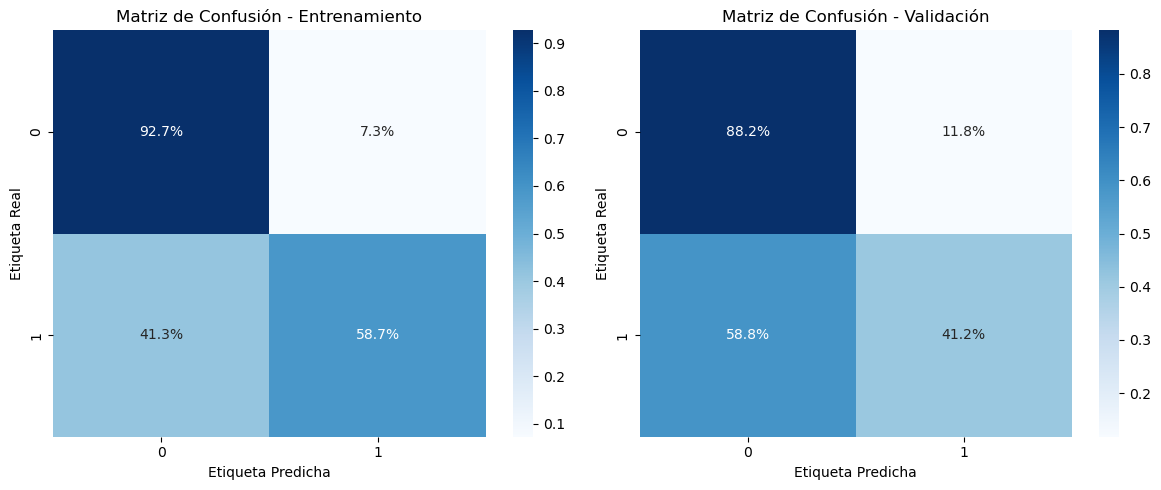

In [24]:
modelo, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)
mostrar_resultados(train_auc_pr, val_auc_pr, cm_train, cm_val)

## 4. Mejoras en el preprocesamiento:

En este apartado visualizaremos como las distintas técnicas de preprocesamiento pueden mejorar o empeorar el rendimiento del modelo base. 

El objetivo es encontrar las técnicas más apropiadas que hagan maximizar el área bajo la curva precisión-recall.

### 4.1. Imputación de valores faltantes:

En este apartado probaremos cómo afecta cada uno de los métodos de imputación de outliers. Probaremos los siguientes métodos:

- Imputación por la media
- Imputación por la mediana
- Imputación por la moda
- Imputación por KNN

Para realizar las pruebas, crearemos una función para visualizar y comparar los resultados:

In [25]:
def comparar_resultados(resultados, figsize=(10, 6), y_lim=None):
    nombres = np.array([r['nombre_prueba'] for r in resultados])
    train_scores = np.array([r['train_auc_pr'] for r in resultados])
    val_scores = np.array([r['val_auc_pr'] for r in resultados])
    # Ordenamos los valores según los valores obtenidos en validación
    idx_sorted_val_scores = np.argsort(val_scores)[::-1]
    sorted_train_scores = train_scores[idx_sorted_val_scores]
    sorted_val_scores = val_scores[idx_sorted_val_scores]
    sorted_nombres = nombres[idx_sorted_val_scores]

    n = len(nombres)
    if n > 5:
        n = 5

    x = np.arange(n)  # posiciones en el eje X
    width = 0.35  # ancho de las barras

    fig, ax = plt.subplots(figsize=figsize)
    bars1 = ax.bar(x - width/2, sorted_train_scores[:n], width, label='Train AUC-PR')
    bars2 = ax.bar(x + width/2, sorted_val_scores[:n], width, label='Validation AUC-PR')

    ax.set_ylabel('AUC-PR')
    ax.set_title('Comparación de AUC-PR')
    ax.set_xticks(x)
    ax.set_xticklabels(sorted_nombres[:n], rotation=45, ha='right', fontsize=8)
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    # Aplicar límites del eje Y si se proporciona
    if y_lim is not None:
        ax.set_ylim(y_lim)

    # Mostrar los valores encima de las barras
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

Probamos los distintos métodos de imputar datos:

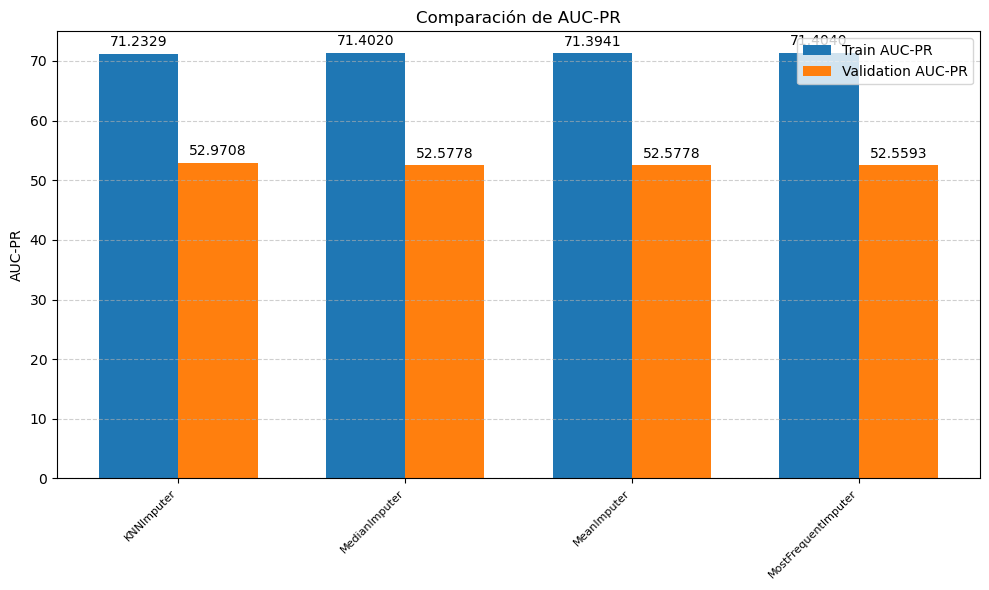

In [26]:
imputers = [("MeanImputer",SimpleImputer(strategy="mean")), 
              ("MedianImputer",SimpleImputer(strategy="median")), 
              ("MostFrequentImputer", SimpleImputer(strategy="most_frequent")),
              ("KNNImputer", KNNImputer())]

resultados = []

for imputer_name, imputer in imputers:
    # Definimos el preprocesador de variables categóricas
    categorical_preprocessor = Pipeline(steps=[
        ('ordinal_encoder', ce.OrdinalEncoder())
    ])

    # Definimos el preprocesador de variables numéricas con valores faltantes
    numerical_preprocessor = Pipeline(steps=[
        ('imputer', imputer)
    ])

    # Creamos el preprocesador final
    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
            ('numerical_preprocessor', numerical_preprocessor, variables_numericas)
        ]
    )

    # Creamos el modelo
    modelo = Pipeline([
        ('var_generator', GeneradorVariables()),
        ('preprocessor', preprocessor),
        ('knn', neighbors.KNeighborsClassifier())
    ])

    # Obtenemos los resultados
    _, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)

    # Almacenamos el resultado
    resultado = {"nombre_prueba" : imputer_name,
               "train_auc_pr" : train_auc_pr,
               "val_auc_pr" : val_auc_pr}
    
    resultados.append(resultado)
    
comparar_resultados(resultados)

Ya que no hay gran diferencia, continuaremos con el método de imputación por la media.

### 4.2. Codificación de las variables categóricas:

A continuación analizaremos el efecto de distintos métodos para codificar variables categóricas en variables numéricas. Probaremos los siguientes métodos:

- Codificación por conteo
- Codificación ordinal
- Codificación binaria
- Codificación One Hot Encoding
- Codificación basada en la salida del problema de clasificación

Hay que tener en cuenta que dentro de las variables categóricas tenemos dos clases, las ordinales y las nominales. Por tanto, utilizaremos distintas codificaciones para cada una de estas.

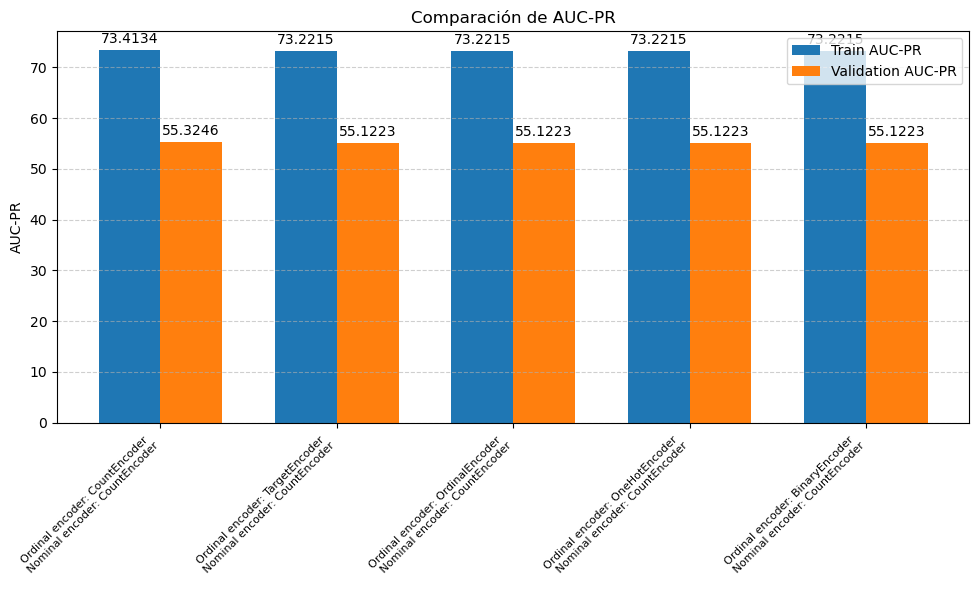

In [27]:
encoders = [("BinaryEncoder", ce.BinaryEncoder()), 
            ("OneHotEncoder", ce.OneHotEncoder()), 
            ("CountEncoder", ce.CountEncoder()), 
            ("OrdinalEncoder", ce.OrdinalEncoder()), 
            ("TargetEncoder", ce.TargetEncoder())]

resultados = []

for nominal_encoder_name, nominal_encoder in encoders:
    for ordinal_encoder_name, ordinal_encoder in encoders:
        # Definimos el preprocesador de variables categóricas
        nominal_categorical_preprocessor = Pipeline(steps=[
            ('nominal_encoder', nominal_encoder)
        ])
        ordinal_categorical_preprocessor = Pipeline(steps=[
            ('ordinal_encoder', ordinal_encoder)
        ])

        # Definimos el preprocesador de variables numéricas con valores faltantes
        numerical_preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy="mean"))
        ])

        # Creamos el preprocesador final
        preprocessor = ColumnTransformer(
            transformers=[
                ('nominal_categorical_preprocessor', nominal_categorical_preprocessor, variables_categoricas_nominales),
                ('ordinal_categorical_preprocessor', ordinal_categorical_preprocessor, variables_categoricas_ordinales),
                ('numerical_preprocessor', numerical_preprocessor, variables_numericas)
            ]
        )

        # Creamos el modelo
        modelo = Pipeline([
            ('var_generator', GeneradorVariables()),
            ('preprocessor', preprocessor),
            ('knn', neighbors.KNeighborsClassifier())
        ])
        # Obtenemos los resultados
        _, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)
        
        nombre_prueba = f"Ordinal encoder: {ordinal_encoder_name} \n Nominal encoder: {nominal_encoder_name}"
        resultado = {"nombre_prueba" : nombre_prueba,
                "train_auc_pr" : train_auc_pr,
                "val_auc_pr" : val_auc_pr}
        
        resultados.append(resultado)

comparar_resultados(resultados)

Podemos observar que el codificador que ofrece mejores resultados, tanto para las variables categóricas **ordinales** como **nominales**, es el **`CountEncoder`**. Esto resulta coherente al utilizar un modelo **K-Nearest Neighbors (KNN)**, ya que este tipo de codificación permite distinguir más fácilmente entre valores frecuentes y poco frecuentes.

En concreto, al codificar las categorías según su frecuencia de aparición en el conjunto de datos, la diferencia numérica entre una categoría común y una rara se vuelve significativa. Esto ayuda al algoritmo de vecinos más cercanos a capturar mejor la relación entre los ejemplos, ya que las distancias reflejan, de forma implícita, la representatividad de cada valor.

Además de facilitar esta distinción, `CountEncoder` presenta otra ventaja importante: **no incrementa la dimensionalidad del dataset**. A diferencia de otros métodos como `OneHotEncoder`, no genera columnas adicionales, lo que implica un menor **coste computacional** y una mayor eficiencia, especialmente en conjuntos de datos con muchas categorías.

### 4.3. Transformación de variables

Durante el análisis exploratorio se observó que las variables numéricas no siguen una distribución normal. Por ello, aplicaremos diversas transformaciones con el objetivo de aproximarlas a una distribución normal. Las transformaciones consideradas son:

- Transformación logarítmica  
- Transformación de raíz cuadrada  
- Transformación Box-Cox o Yeo-Johnson (según el dominio de la variable)  
- Transformación basada en cuantiles (Quantile Transformation)

Evaluaremos visualmente el efecto de cada una de estas transformaciones sobre la distribución de las variables numéricas.

Primero crearemos una función para visualizar dichas transformaciones:

In [28]:
def visualizar_transformaciones(df, variables):
    for var in variables:
        fig, axes = plt.subplots(1, 5, figsize=(30, 6))  # Ahora hay 6 subgráficas
        fig.suptitle(f'Transformaciones para la variable: {var}', fontsize=16)
        
        col_original = df[var]
        
        # Asegurar que los datos sean positivos para log, sqrt
        if (col_original <= 0).any():
            shift = abs(col_original.min()) + 1
            col_pos = col_original + shift
        else:
            shift = 0
            col_pos = col_original.copy()

        # Original
        axes[0].hist(col_original.dropna(), bins=30, color='skyblue')
        axes[0].set_title('Original')

        # Raíz Cuadrada (Sqrt)
        axes[1].hist(np.sqrt(col_pos).dropna(), bins=30, color='orange')
        axes[1].set_title('Sqrt')

        # Logaritmo (Log)
        axes[2].hist(np.log(col_pos).dropna(), bins=30, color='green')
        axes[2].set_title('Log')

        # Box-Cox / Yeo-Johnson (usando PowerTransformer de scikit-learn)
        power_transformer = PowerTransformer(method='box-cox' if (col_pos > 0).all() else 'yeo-johnson')
        transformed_power = power_transformer.fit_transform(col_pos.values.reshape(-1, 1))
        axes[3].hist(transformed_power, bins=30, color='red')
        axes[3].set_title('Box-Cox / Yeo-Johnson')

        # Quantile Transformation (Transformación basada en cuantiles)
        quantile_transformer = QuantileTransformer(output_distribution='normal')
        transformed_quantiles = quantile_transformer.fit_transform(col_pos.values.reshape(-1, 1))
        axes[4].hist(transformed_quantiles, bins=30, color='purple')
        axes[4].set_title('Quantile Transformation')

        # Mostrar las gráficas
        for ax in axes:
            ax.grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

Visualizamos las transformaciones:

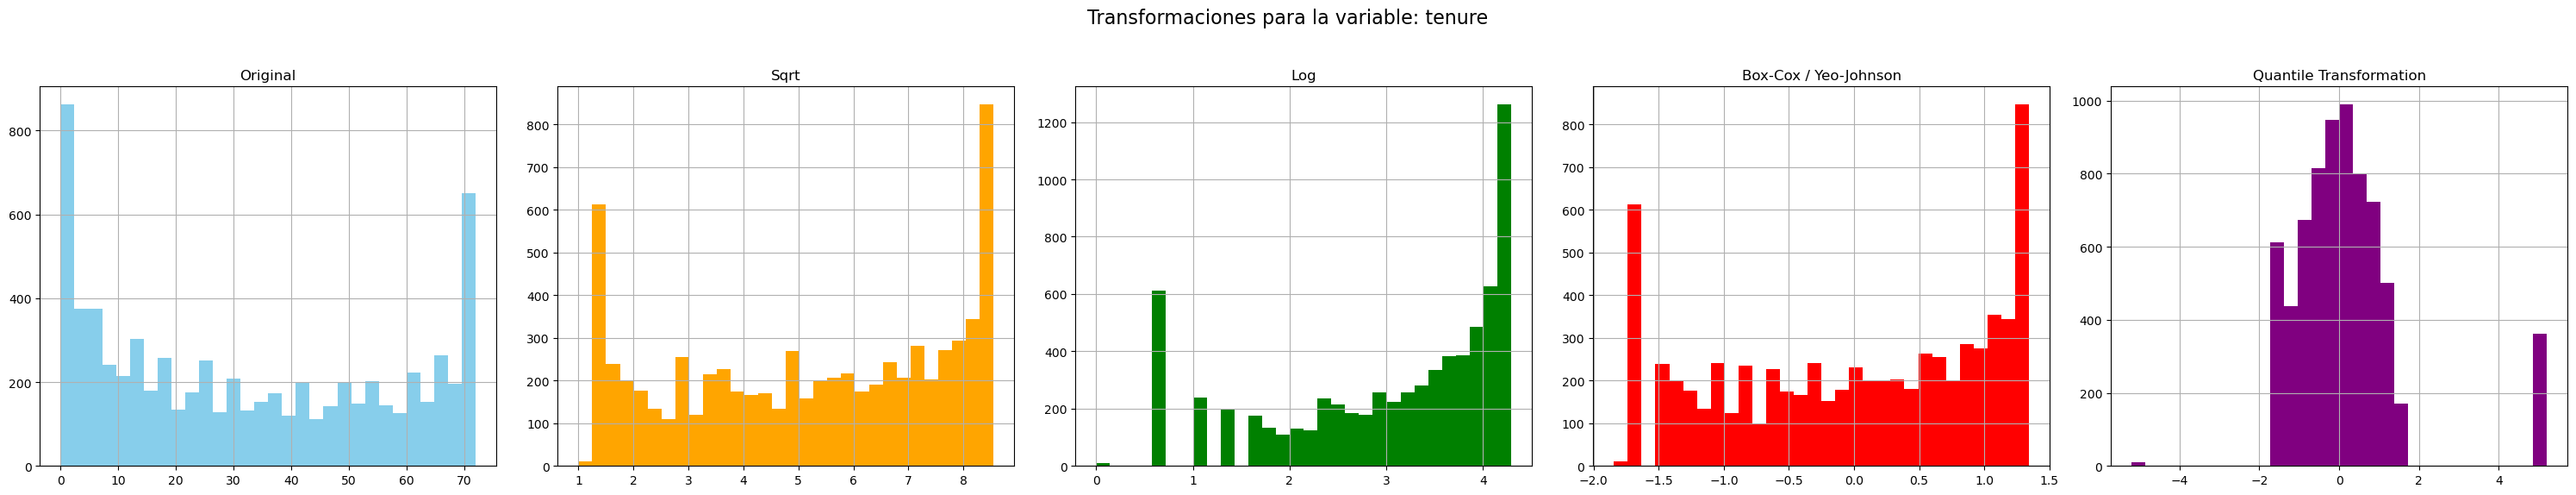

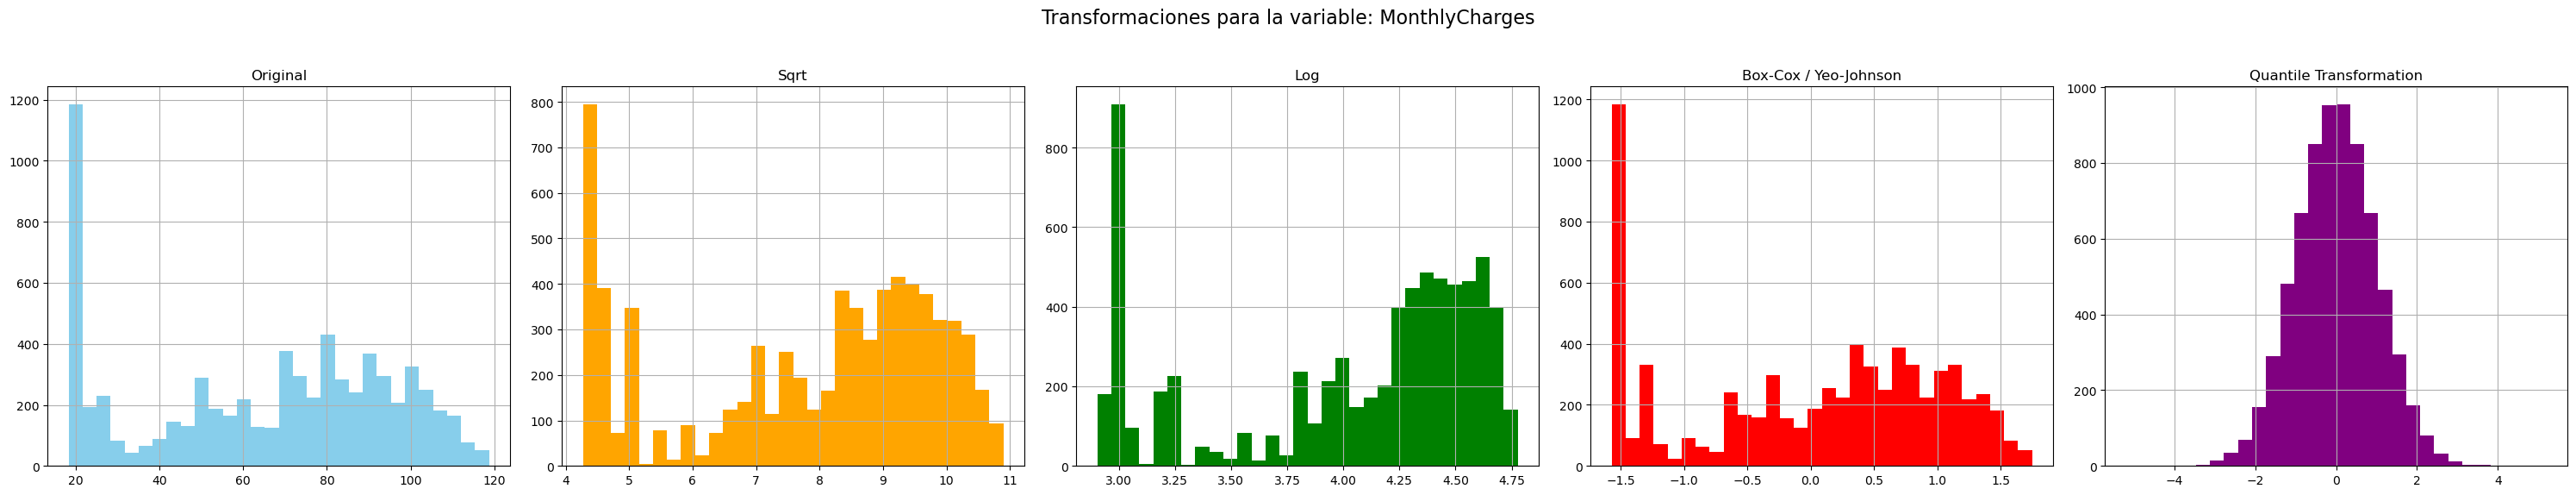

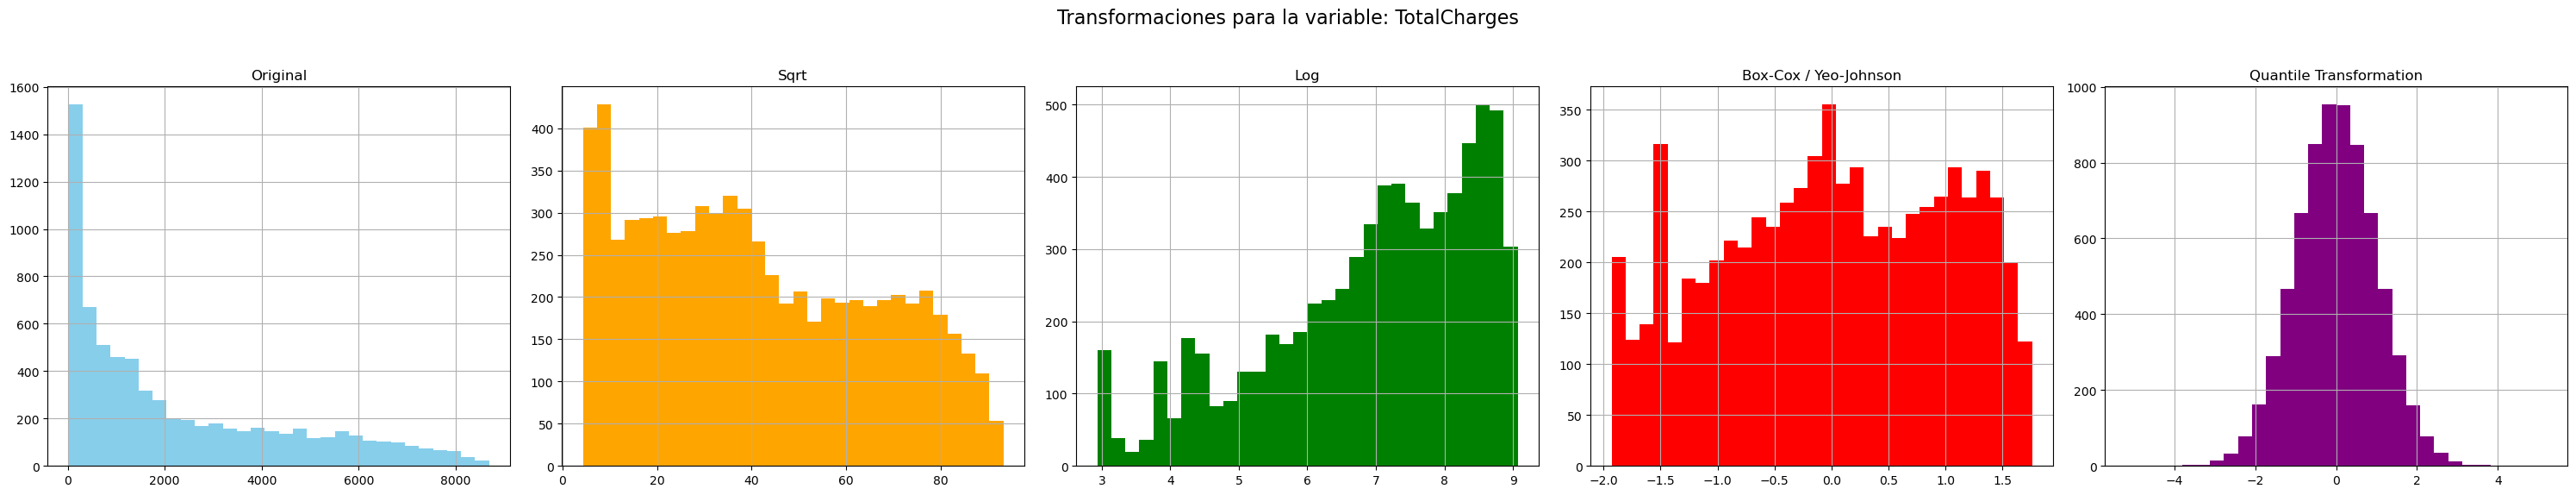

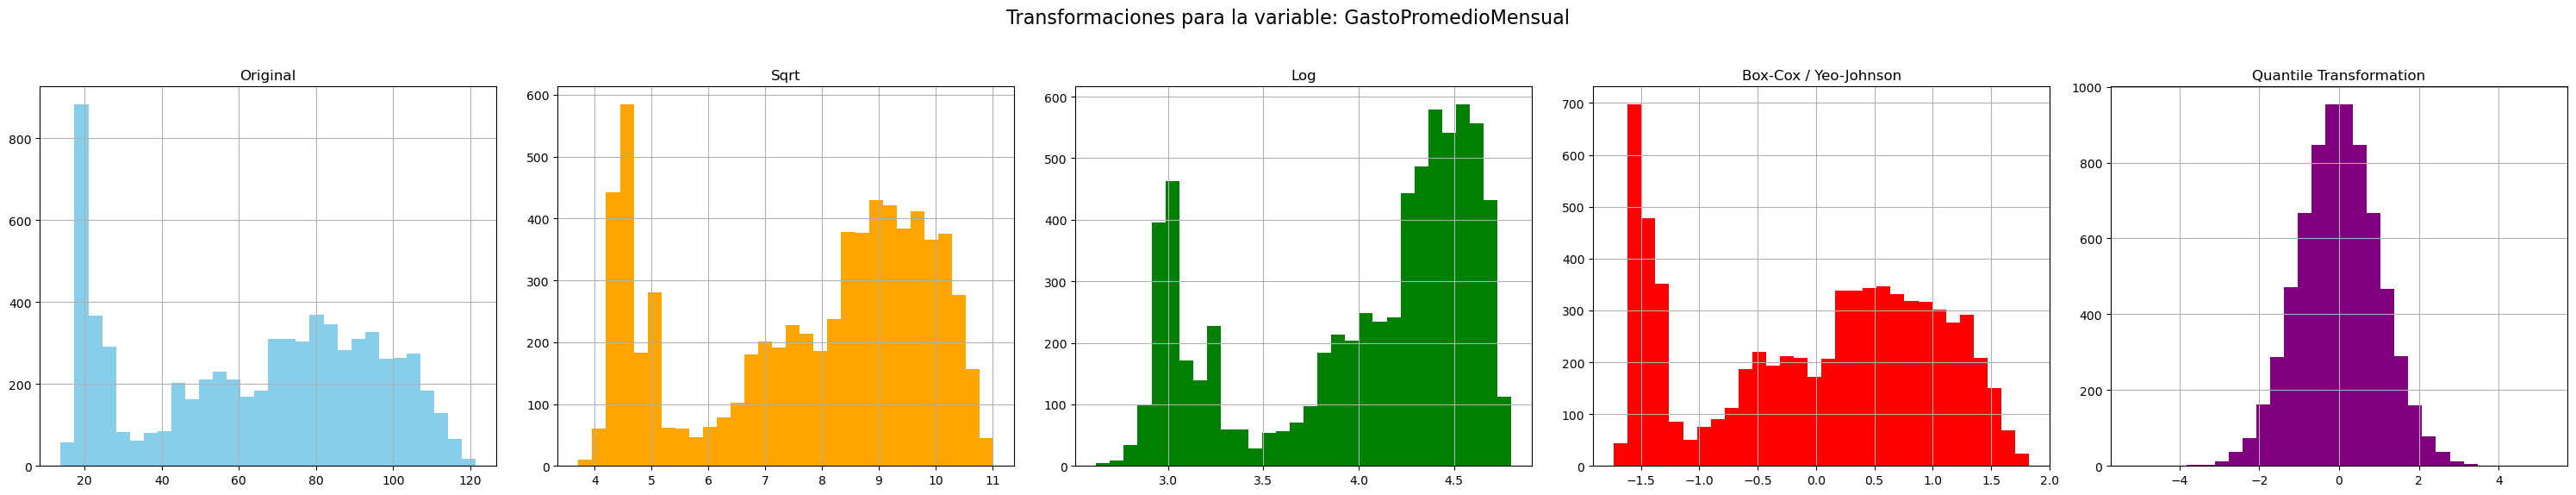

In [29]:
visualizar_transformaciones(generated_data, variables_numericas)

Como se puede observar, la transformación basada en cuantiles es la que mejor aproxima las variables numéricas a una distribución normal. 

Para evaluar su impacto en el rendimiento del modelo, probaremos distintas combinaciones en el preprocesamiento. En concreto, analizaremos si aplicar o no esta transformación de forma individual para cada variable mejora la capacidad de clasificación.

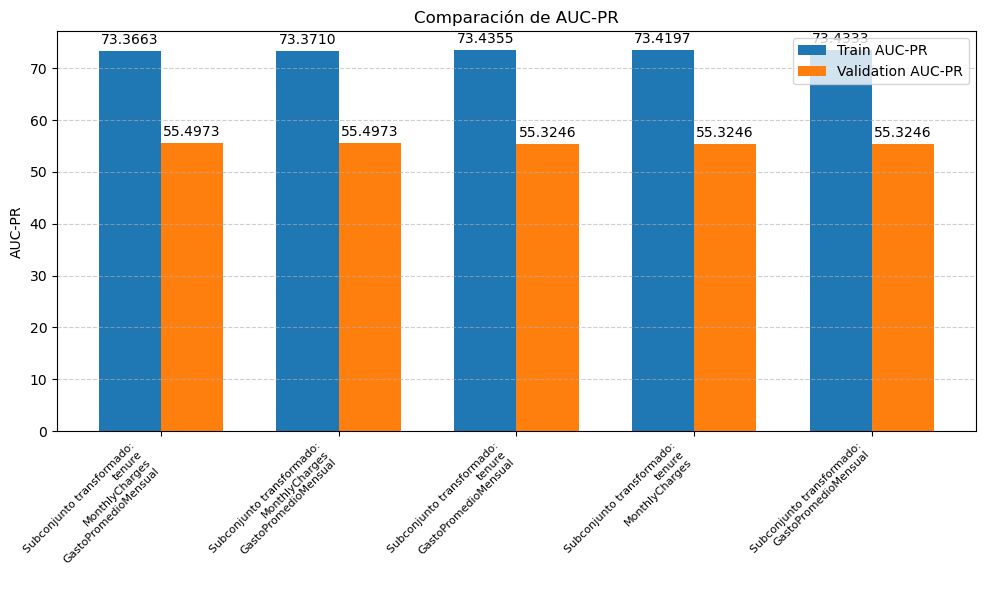

In [30]:
from itertools import chain, combinations

subconjuntos = list(chain.from_iterable(combinations(variables_numericas, r) for r in range(len(variables_numericas)+1)))
resultados = []

for subconjunto_trans in subconjuntos:
        subconjunto_no_trans = [v for v in variables_numericas if v not in subconjunto_trans]
        # Definimos el preprocesador de variables categóricas
        categorical_preprocessor = Pipeline(steps=[
            ('encoder', ce.CountEncoder())

        ])

        # Definimos el preprocesador de variables numéricas con QuantileTransformer
        numerical_trans_preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy="mean")),
            ('transformer', QuantileTransformer())
        ])

        # Definimos el preprocesador de variables numéricas 
        numerical_preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy="mean"))
        ])

        # Creamos el preprocesador final
        preprocessor = ColumnTransformer(
            transformers=[
                ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
                ('numerical_trans_preprocessor', numerical_trans_preprocessor, subconjunto_trans),
                ('numerical_preprocessor', numerical_preprocessor, subconjunto_no_trans)
            ]
        )

        # Creamos el modelo
        modelo = Pipeline([
            ('var_generator', GeneradorVariables()),
            ('preprocessor', preprocessor),
            ('knn', neighbors.KNeighborsClassifier())
        ])

        # Obtenemos los resultados
        _, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)
        
        nombre_prueba = "Subconjunto transformado:\n" + "\n".join(subconjunto_trans)
        resultado = {"nombre_prueba" : nombre_prueba,
                "train_auc_pr" : train_auc_pr,
                "val_auc_pr" : val_auc_pr}
        
        resultados.append(resultado)

comparar_resultados(resultados)

Dado que transformar las variables `tenure`, `MonthlyCharges` y `GastoPromedioMensual` contribuye a una ligera mejora en el AUC-PR, decidimos mantener dicha transformación en el preprocesamiento. Esta mejora probablemente se deba a que el modelo KNN tiende a funcionar mejor cuando las variables numéricas siguen una distribución aproximadamente normal. 

Además, trabajar con variables normalizadas facilita procesos posteriores como la detección de outliers o la aplicación de técnicas de escalado, mejorando así la estabilidad y el rendimiento general del modelo.

Para ello, crearemos una lista con las variables a transformar:

In [31]:
variables_numericas_trans = ["tenure", "MonthlyCharges", "GastoPromedioMensual"]
variables_numericas_no_trans = ["TotalCharges"]

### 4.4. Normalización de las variables:

En este apartado, visualizaremos el efecto de la normalización sobre las variables **numéricas** y **categóricas**. Para las variables numéricas, probaremos los siguientes métodos de normalización:

- **Estandarización mediante la media y la desviación estándar (Z-score)**.
- **Estandarización mediante el mínimo y el máximo (min-max)**.

Para las variables categóricas, únicamente probaremos la **normalización min-max**, ya que el uso del Z-score podría distorsionar los patrones de **rareza** que son cruciales para modelos como **KNN**, los cuales se benefician de la frecuencia de aparición de las categorías.

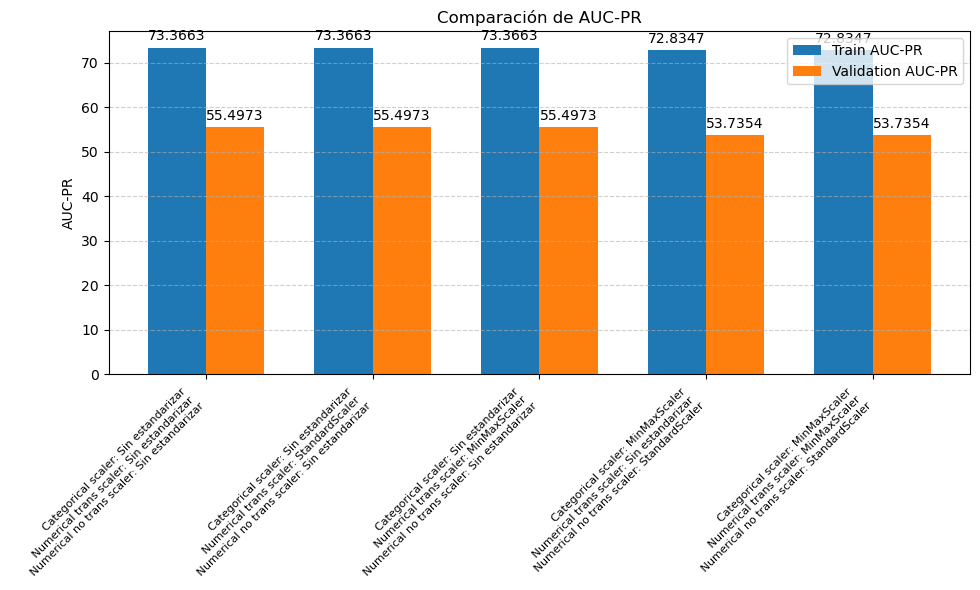

In [32]:
numerical_scalers = [("Sin estandarizar", "passthrough"), 
                     ("StandardScaler", StandardScaler()),
                     ("MinMaxScaler", MinMaxScaler())]

categorical_scalers = [("Sin estandarizar", "passthrough"),
                       ("MinMaxScaler", MinMaxScaler())]

resultados = []

for numerical_scaler_name, numerical_scaler in numerical_scalers:
    for numerical_trans_scaler_name, numerical_trans_scaler in numerical_scalers:
        for categorical_scaler_name, categorical_scaler in categorical_scalers:
            # Definimos el preprocesador de variables categóricas
            categorical_preprocessor = Pipeline(steps=[
                ('encoder', ce.CountEncoder()),
                ('scaler', categorical_scaler)

            ])

            # Definimos el preprocesador de variables numéricas con QuantileTransformer
            numerical_trans_preprocessor = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy="mean")),
                ('transformer', QuantileTransformer()),
                ('scaler', numerical_trans_scaler)
            ])

            # Definimos el preprocesador de variables numéricas 
            numerical_preprocessor = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy="mean")),
                ('scaler', numerical_scaler)
            ])

            # Creamos el preprocesador final
            preprocessor = ColumnTransformer(
                transformers=[
                    ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
                    ('numerical_trans_preprocessor', numerical_trans_preprocessor, variables_numericas_trans),
                    ('numerical_preprocessor', numerical_preprocessor, variables_numericas_no_trans)
                ]
            )

            # Creamos el modelo
            modelo = Pipeline([
                ('var_generator', GeneradorVariables()),
                ('preprocessor', preprocessor),
                ('knn', neighbors.KNeighborsClassifier())
            ])

            # Obtenemos los resultados
            _, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)
            
            nombre_prueba = f"Categorical scaler: {categorical_scaler_name} \n Numerical trans scaler: {numerical_trans_scaler_name} \n Numerical no trans scaler: {numerical_scaler_name}"
            resultado = {"nombre_prueba" : nombre_prueba,
                    "train_auc_pr" : train_auc_pr,
                    "val_auc_pr" : val_auc_pr}
            
            resultados.append(resultado)

comparar_resultados(resultados)

Podemos observar que la opción más conveniente es **no normalizar las variables numéricas**. Esto probablemente se debe a que algunas de las variables tienen una **alta relevancia** en el modelo. Al aplicar una normalización, se reduce su **escala relativa**, lo que disminuye su influencia en el cálculo de distancias, especialmente en modelos como **KNN**. Como resultado, su contribución a la clasificación final se vuelve **menos significativa** en comparación con mantenerlas en su **escala original**.

### 4.5. Detección de outliers:

En este apartado, analizaremos el efecto de la **detección de outliers** en las variables numéricas. Para ello, probaremos los siguientes métodos de detección:

- **Detección de outliers mediante el método de la media y la desviación estándar.**
- **Detección de outliers mediante el método del rango intercuartil (IQR).**

Sin embargo, dado que las variables numéricas actuales presentan una **distribución no normal**, antes de aplicar cualquier método de detección, intentaremos encontrar una **transformación adecuada** que convierta cada variable en una distribución más normalizada.

Creamos los componentes encargados de detectar outliers mediante el método del rango intercuartil. En el primero, sustituiremos los outliers por la mediana:

In [33]:
class OutlierDetecion_treatment_IQR(TransformerMixin):

    # Constructor de la clase
    def __init__(self, k=1.5, columns=None):
        self.k = k
        self.columns = columns
    
    # Método fit
    def fit(self, X, y=None):
        # Transformamos X a DataFrame por si llega un array de Numpy (para compatibilidad en la Pipeline)
        X = pd.DataFrame(X)
        if self.columns == None:
            # Si no se determinan variables en el constructor si tratan todas
            self.columns = X.columns
        self.stats = X[self.columns].describe()
        # Devolvemos el propio objeto modificado
        return self

    # Método transform
    def transform(self, X):
        # Transformamos X a DataFrame por si llega un array de Numpy (para compatibilidad en la Pipeline)
        X = pd.DataFrame(X)
        # Creamos una copia del DataFrame X para no perder los datos originales
        Xaux = X.copy()
        # Se calcula el IQR de cada variable
        IQRs = self.stats.loc['75%'] - self.stats.loc['25%']
        # Se calculan los límites inferiores y superiores   
        limiteInf = self.stats.loc['25%'] - self.k * IQRs
        limiteSup = self.stats.loc['75%'] + self.k * IQRs
        # Se comprueba qué elementos están por encima y por debajo de dichos límites (máscaras de booleanos)  
        menores = X[self.columns] < limiteInf
        mayores = X[self.columns] > limiteSup

        # Se recorren las variables para detectar outliers y tratarlos (sustituir por la mediana de la variable)
        for c in self.columns:
            # obtenemos la lista de booleanos correspondientes a si los valores de los ejemplos son outliers o no para la variable c
            indices = np.logical_or(menores[c], mayores[c])
            # Si hay outliers
            for idx in X[indices].index:
                # Los sustituimos por la mediana
                Xaux.at[idx, c] = self.stats.loc['50%'][c]
                
        # Se devuelve el DataFrame modificado
        return Xaux
    
    # Método para asignar los valores de los híper-parámetros y que, de este modo, 
        # podamos aplicar GridSearchCV sobre un objeto de esta clase
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    # Método para obtener los valores de los híper-parámetros que queramos del modelo (lo usa GridSearchCV al mostrar la mejor configuración)
    def get_params(self, deep=True):
        # Devolvemos los valores de los híper-parámetros del método de preparación de datos
        return {"k": self.k}

En este segundo componente, sustituiremos los outliers por el mínimo o el máximo:

In [34]:
class OutlierDetectionClipping_IQR(OutlierDetecion_treatment_IQR):
    # Constructor de la clase
    def __init__(self, k=2, columns=None):
        self.k = k
        self.columns = columns

    def transform(self, X):
        """Versión que reemplaza outliers por los límites (clipping) en lugar de la mediana"""
        X = pd.DataFrame(X)
        Xaux = X.copy()
        IQRs = self.stats.loc['75%'] - self.stats.loc['25%']
        limiteInf = self.stats.loc['25%'] - self.k * IQRs
        limiteSup = self.stats.loc['75%'] + self.k * IQRs
        
        # Aplicar clipping en lugar de reemplazo por mediana
        for col in self.columns:
            Xaux[col] = Xaux[col].clip(lower=limiteInf[col], upper=limiteSup[col])
        
        return Xaux
    
     # Método para asignar los valores de los híper-parámetros y que, de este modo, 
        # podamos aplicar GridSearchCV sobre un objeto de esta clase
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    # Método para obtener los valores de los híper-parámetros que queramos del modelo (lo usa GridSearchCV al mostrar la mejor configuración)
    def get_params(self, deep=True):
        # Devolvemos los valores de los híper-parámetros del método de preparación de datos
        return {"k": self.k}

Creamos el componente encargado de detectar outliers mediante el método de la media y la desviación. En este primer componente sustituiremos el outlier por la mediana:

In [35]:
class OutlierDetecion_treatment_MeanStd(TransformerMixin):

    # Constructor de la clase
    def __init__(self, k=2, columns=None):
        self.k = k
        self.columns = columns
    
    # Método fit
    def fit(self, X, y=None):
        # Transformamos X a DataFrame por si llega un array de Numpy (para compatibilidad en la Pipeline)
        X = pd.DataFrame(X)
        if self.columns == None:
            # Si no se determinan variables en el constructor si tratan todas
            self.columns = X.columns
        self.stats = X[self.columns].describe()
        # Devolvemos el propio objeto modificado
        return self

    # Método transform
    def transform(self, X):
        # Transformamos X a DataFrame por si llega un array de Numpy (para compatibilidad en la Pipeline)
        X = pd.DataFrame(X)
        # Creamos una copia del DataFrame X para no perder los datos originales
        Xaux = X.copy()
        # Se calculan los límites inferiores y superiores   
        limiteInf = self.stats.loc['mean'] - self.k * self.stats.loc['std']
        limiteSup = self.stats.loc['mean'] + self.k * self.stats.loc['std']
        # Se comprueba qué elementos están por encima y por debajo de dichos límites (máscaras de booleanos)  
        menores = X[self.columns] < limiteInf
        mayores = X[self.columns] > limiteSup

        # Se recorren las variables para detectar outliers y tratarlos (sustituir por la mediana de la variable)
        for c in self.columns:
            # obtenemos la lista de booleanos correspondientes a si los valores de los ejemplos son outliers o no para la variable c
            indices = np.logical_or(menores[c], mayores[c])
            # Si hay outliers
            for idx in X[indices].index:
                # Los sustituimos por la mediana
                Xaux.at[idx, c] = self.stats.loc['50%'][c]
                
        # Se devuelve el DataFrame modificado
        return Xaux
    
    # Método para asignar los valores de los híper-parámetros y que, de este modo, 
        # podamos aplicar GridSearchCV sobre un objeto de esta clase
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    # Método para obtener los valores de los híper-parámetros que queramos del modelo (lo usa GridSearchCV al mostrar la mejor configuración)
    def get_params(self, deep=True):
        # Devolvemos los valores de los híper-parámetros del método de preparación de datos
        return {"k": self.k}

En este segundo componente sustituiremos los outliers por el mínimo o el máximo:

In [36]:
class OutlierDetectionClipping_MeanStd(OutlierDetecion_treatment_MeanStd):
     # Constructor de la clase
    def __init__(self, k=2, columns=None):
        self.k = k
        self.columns = columns
    

    def transform(self, X):
        """Versión con clipping para el método de media ± k*std"""
        X = pd.DataFrame(X)
        Xaux = X.copy()
        limiteInf = self.stats.loc['mean'] - self.k * self.stats.loc['std']
        limiteSup = self.stats.loc['mean'] + self.k * self.stats.loc['std']
        
        # Clipping en lugar de mediana
        for col in self.columns:
            Xaux[col] = Xaux[col].clip(lower=limiteInf[col], upper=limiteSup[col])
        
        return Xaux
    
    # Método para asignar los valores de los híper-parámetros y que, de este modo, 
        # podamos aplicar GridSearchCV sobre un objeto de esta clase
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    # Método para obtener los valores de los híper-parámetros que queramos del modelo (lo usa GridSearchCV al mostrar la mejor configuración)
    def get_params(self, deep=True):
        # Devolvemos los valores de los híper-parámetros del método de preparación de datos
        return {"k": self.k}

Realizamos las pruebas:

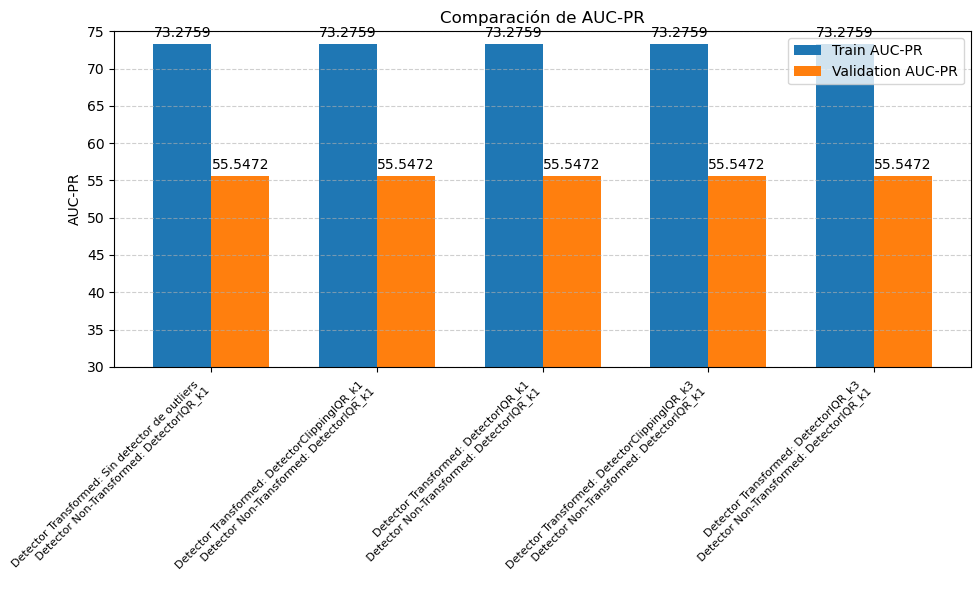

In [37]:
# Lista de detectores con diferentes valores de k
k_values = [1, 2, 3] 
outlier_detectors = []

# Crear una lista de detectores con diferentes valores de k
for k in k_values:
    outlier_detectors.append(("Sin detector de outliers", "passthrough"))
    outlier_detectors.append((f"DetectorMeanStd_k{k}", OutlierDetecion_treatment_MeanStd(k=k)))
    outlier_detectors.append((f"DetectorIQR_k{k}", OutlierDetecion_treatment_IQR(k=k)))
    outlier_detectors.append((f"DetectorClippingMeanStd_k{k}", OutlierDetectionClipping_MeanStd(k=k)))
    outlier_detectors.append((f"DetectorClippingIQR_k{k}", OutlierDetectionClipping_IQR(k=k)))

resultados = []

# Probamos cada combinación de detectores
for detector_trans_name, detector_trans in outlier_detectors:
    for detector_non_trans_name, detector_non_trans in outlier_detectors:
        # Definimos el preprocesador de variables categóricas
        categorical_preprocessor = Pipeline(steps=[
            ('encoder', ce.CountEncoder())
        ])

        # Preprocesador para variables numéricas transformadas
        numerical_trans_preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy="mean")),
            ('transformer', QuantileTransformer()),
            ('out_detector', detector_trans)  # Detector específico para transformadas
        ])

        # Preprocesador para variables numéricas no transformadas
        numerical_preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy="mean")),
            ('out_detector', detector_non_trans)  # Detector específico para no transformadas
        ])

        # Creamos el preprocesador final
        preprocessor = ColumnTransformer(
            transformers=[
                ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
                ('numerical_trans_preprocessor', numerical_trans_preprocessor, variables_numericas_trans),
                ('numerical_preprocessor', numerical_preprocessor, variables_numericas_no_trans)
            ]
        )

        # Creamos el modelo
        modelo = Pipeline([
            ('var_generator', GeneradorVariables()),
            ('preprocessor', preprocessor),
            ('knn', neighbors.KNeighborsClassifier())
        ])

        # Obtenemos los resultados
        _, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)
        
        # Generamos el nombre de la prueba para las combinaciones de detectores
        nombre_prueba = f"Detector Transformed: {detector_trans_name} \n Detector Non-Transformed: {detector_non_trans_name}"
        
        # Almacenamos los resultados
        resultado = {"nombre_prueba" : nombre_prueba,
                     "train_auc_pr" : train_auc_pr,
                     "val_auc_pr" : val_auc_pr}
        
        resultados.append(resultado)

# Comparar los resultados
comparar_resultados(resultados, figsize=(10, 6), y_lim=(30, 75))

El mejor resultado se ha obtenido al aplicar el detector de outliers basado en el rango intercuartíl (IQR), que sustituye los valores atípicos por la mediana, con un valor de k = 1. Este detector ha sido especialmente efectivo cuando se ha aplicado únicamente sobre las variables numéricas no transformadas.

Este comportamiento puede deberse a que las transformaciones como QuantileTransformer ya tienden a reducir el impacto de los outliers al redistribuir los datos de forma uniforme. Por tanto, aplicar una detección y tratamiento adicional de outliers sobre variables ya transformadas puede resultar redundante o incluso contraproducente. En cambio, para las variables no transformadas, el reemplazo de valores extremos por la mediana puede reducir el ruido y mejorar la robustez del modelo, especialmente en algoritmos como KNN, que se ven muy influenciados por la escala y la presencia de valores extremos.

Dado estos resultados, se continuará utilizando este método de detección de outliers exclusivamente sobre las variables numéricas no transformadas.

### 4.6. Selección de variables:

Cuando se tienen muchos ejemplos de alta dimensionalidad, aplicar técnicas de minería de datos y entrenar modelos de aprendizaje resulta muy costoso. Para reducir el coste computacional, trataremos de identificar las variables más importantes en nuestro problema.

Para ello vamos a utilizar distintas técnicas:

- Filtro de correlación
- Filtro ANOVA
- Sequential Forward Selection (SFS)
- Sequential Backward Elimination (SBE)
- Selección de variables mediante algoritmos genéticos

Con estos métodos, nuestro objetivo es obtener el mayor rendimiento posible con el menor coste computacional posible.

Crearemos una clase encargada de filtrar las variables según su correlación:

In [38]:
class corr_selection(TransformerMixin):

        # Constructor de la clase
        def __init__(self, umbral=0.9, verbose=False):
            # Umbral deseado para determinar variables correlacionadas
            self.umbral = umbral
            # Parámetro que determina si imprimir información del proceso o no
            self.verbose = verbose

        # Método fit
        def fit(self, X, y=None):
            # Transformamos X en DataFrame por si acaso llega en formato ndarray
            X = pd.DataFrame(X)
            # Calculamos la matriz de correlaciones con la función corr de pandas sobre el DataFrame con las variables de entrada X y la ponemos en valor absoluto
            correlaciones = X.corr().abs()
            # Seleccionamos el triángulo superior de la matriz de correlación
            upper = correlaciones.where(np.triu(np.ones(correlaciones.shape), k=1).astype('bool'))
            # Obtenemos los nombres de aquellas variables con correlación mayor al umbral deseado
            self.variables_a_eliminar = list(set([column for i,column in enumerate(upper.columns) if any(upper[column] > self.umbral)]))

             # Si queremos mostrar información se muestra el número de variables eliminadas y sus nombres
            if self.verbose:
                print('Se han eliminado {} variables, que son: {}'.format(len(self.variables_a_eliminar), self.variables_a_eliminar))
            # Devolvemos el objeto modificado (en este caso ha aprendido qué variables se deben eliminar al estar correlacionadas con otras)
            return self

        # Método transform
        def transform(self, X):
            # Transformamos X en DataFrame por si acaso llega en formato ndarray
            X = pd.DataFrame(X)
            # Creamos una copia del DataFrame X para no perder los datos originales
            X_uncorr = X.copy()
            # Eliminamos las variables con alta correlación con algunda de las variables de entrada
            X_uncorr.drop(self.variables_a_eliminar, axis=1, inplace=True)
            # Devolvemos el DataFrame transformado
            return X_uncorr

        # Método para asignar los valores de los híper-parámetros y que, de este modo, 
            # podamos aplicar GridSearchCV sobre un objeto de esta clase
        def set_params(self, **parameters):
            for parameter, value in parameters.items():
                setattr(self, parameter, value)
            return self

        # Método para obtener los valores de los híper-parámetros que queramos del modelo (lo usa GridSearchCV al mostrar la mejor configuración)
        def get_params(self, deep=True):
            # Devolvemos los valores de los híper-parámetros del método de preparación de datos
            return {"umbral": self.umbral}

Creamos una clase encargada de seleccionar variables con un algoritmo genético:

In [39]:
class SelectorGenetico(BaseEstimator, TransformerMixin):
    def __init__(self, estimator, n_gen=10, population_size=20, scoring=None, cv=3, random_state=1234):
        self.estimator = estimator
        self.n_gen = n_gen
        self.population_size = population_size
        self.scoring = scoring
        self.cv = cv
        self.random_state = random_state

    def fit(self, X, y):
        np.random.seed(self.random_state)
        random.seed(self.random_state)

        n_features = X.shape[1]

        # Definimos el problema de optimización
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Queremos maximizar scoring
        creator.create("Individual", list, fitness=creator.FitnessMax)

        toolbox = base.Toolbox()
        toolbox.register("attr_bool", random.randint, 0, 1)
        toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)

        def eval_individual(individual):
            if sum(individual) == 0:
                return 0.0,  # Penalizar no seleccionar ninguna variable
            X_selected = X[:, np.array(individual) == 1]
            scores = cross_val_score(self.estimator, X_selected, y, cv=self.cv, scoring=self.scoring)
            return np.mean(scores),

        toolbox.register("evaluate", eval_individual)
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
        toolbox.register("select", tools.selTournament, tournsize=3)

        # Creamos la población inicial
        population = toolbox.population(n=self.population_size)

        # Evolucionamos
        hof = tools.HallOfFame(1)  # Hall of fame: mejor individuo

        algorithms.eaSimple(population, toolbox,
                            cxpb=0.5, mutpb=0.2,
                            ngen=self.n_gen,
                            halloffame=hof,
                            verbose=False)

        # Guardamos las mejores features
        self.best_features_ = np.array(hof[0], dtype=bool)

        return self

    def transform(self, X):
        return X[:, self.best_features_]

    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X, y).transform(X)



Para poder evaluar el rendimiento de nuestro modelo en los métodos de selección de variables, primero crearemos un scorer para la métrica del área bajo la curva Precisión - Recall:

In [40]:
score_PR = metrics.make_scorer(score_func=metrics.average_precision_score,
                               greater_is_better=True, 
                               response_method=['predict_proba', 'decision_function', 'predict'])
print(score_PR)

make_scorer(average_precision_score, response_method=['predict_proba', 'decision_function', 'predict'])


Creamos una lista con los métodos de selección que vamos a probar:

In [41]:
# Definimos el estimador base para los métodos secuenciales
clf_base = KNeighborsClassifier()
# Definimos la validación cruzada a utilizar
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=1234)

# Lista de métodos de selección de variables con nombre e instancia
metodos_seleccion = []

# Método sin selección
metodos_seleccion.append(('SinSeleccion', None))

umbrales_correlacion = [0.7, 0.8, 0.9]
for umbral in umbrales_correlacion:
    metodos_seleccion.append((
        f'Correlacion_{umbral}', 
        corr_selection(umbral=umbral)
    ))

# Métodos secuenciales
numeros_caracteristicas = [3, 5, 10, 15]

for num_feats in numeros_caracteristicas:
    # SelectKBest con diferentes valores de k
    metodos_seleccion.append((
        f'SelectKBest_{num_feats}', 
        SelectKBest(score_func=f_classif, k=num_feats)
    ))

    # SFS Forward
    metodos_seleccion.append((
        f'SFS_Forward_{num_feats}', 
        SequentialFeatureSelector(
            estimator=clf_base,
            n_features_to_select=num_feats,
            direction='forward',
            scoring=score_PR,
            cv=cv,
            n_jobs=-1
        )
    ))

    # SFS Backward
    metodos_seleccion.append((
        f'SFS_Backward_{num_feats}', 
        SequentialFeatureSelector(
            estimator=clf_base,
            n_features_to_select=num_feats,
            direction='backward',
            scoring=score_PR,
            cv=cv,
            n_jobs=-1
        )
    ))

# Agregamos el selector genético
metodos_seleccion.append((
    'GeneticSelector', 
    SelectorGenetico(
        estimator=clf_base,         
        scoring=score_PR, 
        n_gen=200,               
        population_size=30,    
        cv=cv,                      
        random_state=1234
    )
))

# --- Combinaciones de filtro + wrapper ---

# Filtro ANOVA + SFS Forward con un porcentaje de selección
metodos_seleccion.append((
    'ANOVA + SFS_Forward_80',
    Pipeline(steps=[
        ('anova_filter', SelectPercentile(score_func=f_classif, percentile=80)),  # Seleccionamos el 80% de las más relevantes
        ('sfs', SequentialFeatureSelector(
            estimator=clf_base,
            n_features_to_select=10,
            direction='forward',
            scoring=score_PR,
            cv=cv,
            n_jobs=-1
        ))
    ])
))

# Filtro ANOVA + SFS Backward con un porcentaje de selección
metodos_seleccion.append((
    'ANOVA + SFS_Backward_80',
    Pipeline(steps=[
        ('anova_filter', SelectPercentile(score_func=f_classif, percentile=80)),  # Seleccionamos el 80% de las más relevantes
        ('sfs', SequentialFeatureSelector(
            estimator=clf_base,
            n_features_to_select=10,
            direction='backward',
            scoring=score_PR,
            cv=cv,
            n_jobs=-1
        ))
    ])
))

# Filtro Correlación + SFS Forward
metodos_seleccion.append((
    'Correlacion_0.8 + SFS_Forward_10',
    Pipeline(steps=[
        ('corr_filter', corr_selection(umbral=0.8)),
        ('sfs', SequentialFeatureSelector(
            estimator=clf_base,
            n_features_to_select=10,
            direction='forward',
            scoring=score_PR,
            cv=cv,
            n_jobs=-1
        ))
    ])
))

# Filtro Correlación + SFS Backward
metodos_seleccion.append((
    'Correlacion_0.8 + SFS_Backward_10',
    Pipeline(steps=[
        ('corr_filter', corr_selection(umbral=0.8)),
        ('sfs', SequentialFeatureSelector(
            estimator=clf_base,
            n_features_to_select=10,
            direction='backward',
            scoring=score_PR,
            cv=cv,
            n_jobs=-1
        ))
    ])
))


Realizamos la prueba:

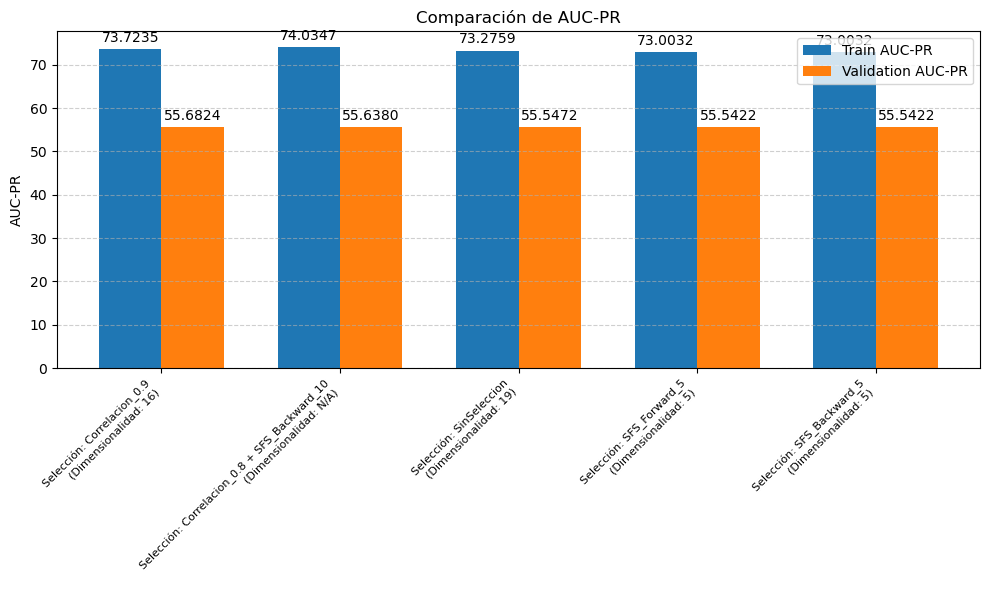

In [42]:
resultados = []

for selector_name, selector in metodos_seleccion:
    # Definimos el preprocesador de variables categóricas
    categorical_preprocessor = Pipeline(steps=[
        ('encoder', ce.CountEncoder())
    ])

    # Preprocesador para variables numéricas transformadas
    numerical_trans_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('transformer', QuantileTransformer())
    ])

    # Preprocesador para variables numéricas no transformadas
    numerical_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('out_detector', OutlierDetecion_treatment_IQR(k=1)) 
    ])

    # Creamos el preprocesador final
    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
            ('numerical_trans_preprocessor', numerical_trans_preprocessor, variables_numericas_trans),
            ('numerical_preprocessor', numerical_preprocessor, variables_numericas_no_trans)
        ]
    )

    # Creamos los pasos de la pipeline
    steps = [('var_generator', GeneradorVariables()),
             ("preprocessor", preprocessor)]
    
    # Añadimos el paso de seleccionar variables si es necesario
    if selector is not None:
        if isinstance(selector, Pipeline):  # Si es una pipeline anidada, la descomponemos
            steps.extend(selector.steps)
        else:
            steps.append(('selector', selector))

    
    # Añadimos el clasificador base
    steps.append(('clf', clf_base))
    
    # Creamos el modelo
    modelo = Pipeline(steps)

    # Evaluación
    _, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)

    # Cálculo del número de características seleccionadas
    if selector is None:
        num_feats = X_train.shape[1]  # Sin selección, todas las características
    elif isinstance(selector, SelectKBest) or isinstance(selector, SelectPercentile):
        # Si es un filtro como SelectKBest o SelectPercentile
        num_feats = np.sum(selector.get_support())  # Número de características seleccionadas
    elif isinstance(selector, SequentialFeatureSelector):
        # Si es un selector secuencial
        num_feats = selector.n_features_to_select  # Número de características seleccionadas
    elif hasattr(selector, 'variables_a_eliminar'):
        # Si el selector tiene el atributo 'variables_a_eliminar', calculamos el número de características
        num_feats = X_train.shape[1] - len(selector.variables_a_eliminar)
    else:
        num_feats = "N/A"  # En caso de que no se pueda determinar el número de características

    # Guardar resultados (estructura simplificada)
    resultados.append({
        "nombre_prueba": f"Selección: {selector_name}\n(Dimensionalidad: {num_feats})",
        "train_auc_pr": train_auc_pr,
        "val_auc_pr": val_auc_pr
    })

comparar_resultados(resultados)

Podemos observar que el rendimiento no mejora con menos variables, de hecho, el rendimiento empeora un poco. Sin embargo, si seleccionamos las variables mediante el filtro ANOVA, podemos tener un modelo que funciona casi igual de bien con la mitad de variables. Más exactamente, podemos pasar de 19 variables a 10.

Por ello, continuaremos utilizando esta selección de variables.

### 4.7. Análisis de Componentes Principales:

Otra técnica utilizada para reducir la dimensionalidad es el Análisis de Componentes Principales (PCA). Esta técnica estadística es utilizada para aumentar la separabilidad de los datos. 

Para probar que tal se adapta esta técnica a nuestro problema, crearemos una nueva pipeline con el siguiente flujo:

- Preprocesamiento de los datos
- Selección de variables
- Normalización de los datos, para que la media sea 0 y la desviación estándar 1 (necesario para aplicar PCA)
- Aplicamos la transformación PCA
- Entrenamiento del clasificador base

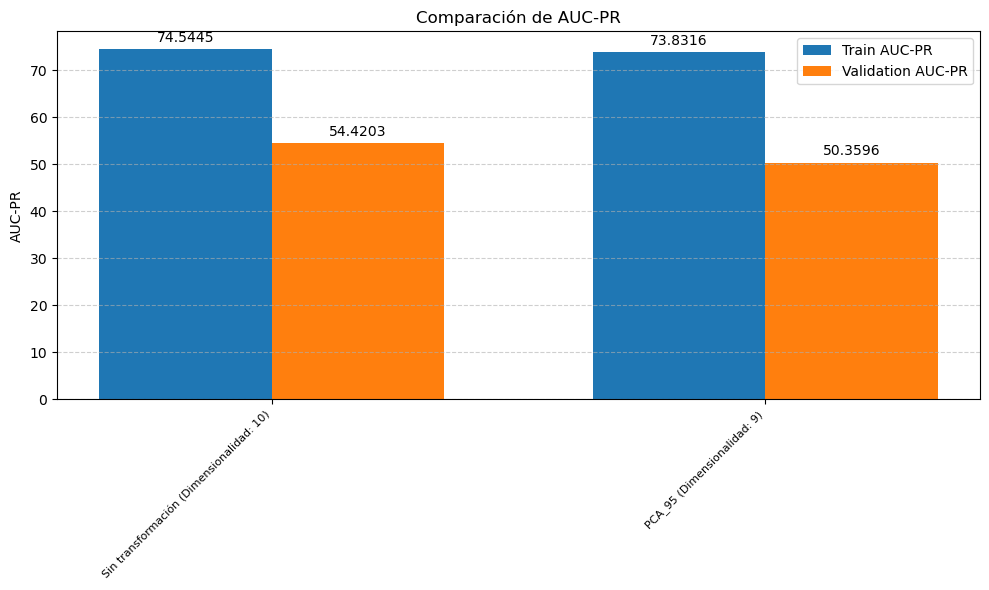

In [43]:
reductores = [("Sin transformación", None),
                          ("PCA_95", PCA(0.95))]

resultados = []

for nombre_reductor, reductor in reductores:
    # Definimos el preprocesador de variables categóricas
    categorical_preprocessor = Pipeline(steps=[
        ('encoder', ce.CountEncoder())
    ])

    # Preprocesador para variables numéricas transformadas
    numerical_trans_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('transformer', QuantileTransformer())
    ])

    # Preprocesador para variables numéricas no transformadas
    numerical_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('out_detector', OutlierDetecion_treatment_IQR(k=1)) 
    ])

    # Creamos el preprocesador final
    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
            ('numerical_trans_preprocessor', numerical_trans_preprocessor, variables_numericas_trans),
            ('numerical_preprocessor', numerical_preprocessor, variables_numericas_no_trans)
        ]
    )

    # Creamos los pasos de la pipeline
    steps = [('var_generator', GeneradorVariables()),
             ("preprocessor", preprocessor),
             ('corr_filter', corr_selection(umbral=0.8)),
             ('sfs', SequentialFeatureSelector(
                 estimator=clf_base,
                 n_features_to_select=10,
                 direction='forward',
                 scoring=score_PR,
                 cv=cv,
                 n_jobs=-1)
                 )
            ]
    
    # Añadimos reductor si corresponde
    if reductor is not None:
        steps.extend([
            ('scaler', StandardScaler()),
            ('reductor', reductor)
        ])
    # Añadimos el clasificador
    steps.append(("clf", clf_base))

    # Creamos el modelo
    modelo = Pipeline(steps)

    # Evaluación
    modelo, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)

    if reductor is not None:
        n_dimensiones = modelo.named_steps['reductor'].n_components_
    else:
        # Sin transformación adicional
        n_dimensiones = 10

    nombre_prueba_final = f"{nombre_reductor} (Dimensionalidad: {n_dimensiones})"
    
    # Guardamos resultados
    resultados.append({
        "nombre_prueba": nombre_prueba_final,
        "train_auc_pr": train_auc_pr,
        "val_auc_pr": val_auc_pr
    })

comparar_resultados(resultados)

Dado que no ha habido ninguna mejora, continuaremos sin utilizar PCA.

### 4.8. Eliminación del ruido

El ruido representa un desafío importante en los problemas de clasificación, ya que puede confundir al modelo durante el proceso de aprendizaje y dificultar la correcta predicción de ejemplos pertenecientes a distintas clases.

Para mitigar este problema, se evaluará el efecto de diferentes técnicas de eliminación de ruido, concretamente:

- **Edited Nearest Neighbours (ENN)**
- **Repeated Edited Nearest Neighbours (RENN)**
- **All KNN**
- **Tomek Links**

Estas técnicas buscan limpiar el conjunto de datos eliminando o corrigiendo instancias conflictivas, con el objetivo de mejorar el rendimiento y la generalización de los modelos de clasificación.


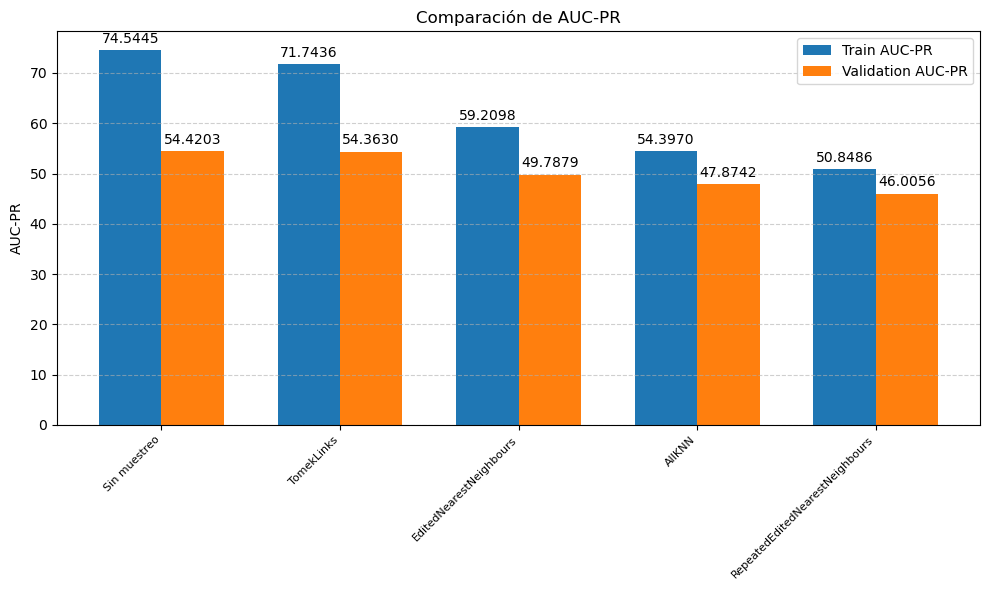

In [44]:
tecnicas_eliminacion_ruido = [
    None,
    EditedNearestNeighbours(),
    RepeatedEditedNearestNeighbours(),
    AllKNN(),
    TomekLinks()]

resultados = []
for tecnica in tecnicas_eliminacion_ruido:
    # Definimos el preprocesador de variables categóricas
    categorical_preprocessor = Pipeline(steps=[
        ('encoder', ce.CountEncoder())
    ])

    # Preprocesador para variables numéricas transformadas
    numerical_trans_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('transformer', QuantileTransformer())
    ])

    # Preprocesador para variables numéricas no transformadas
    numerical_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('out_detector', OutlierDetecion_treatment_IQR(k=1)) 
    ])

    # Creamos el preprocesador final
    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
            ('numerical_trans_preprocessor', numerical_trans_preprocessor, variables_numericas_trans),
            ('numerical_preprocessor', numerical_preprocessor, variables_numericas_no_trans)
        ]
    )

    # Creamos los pasos de la pipeline
    steps = [('var_generator', GeneradorVariables()),
             ("preprocessor", preprocessor),
             ('corr_filter', corr_selection(umbral=0.8)),
             ('sfs', SequentialFeatureSelector(
                 estimator=clf_base,
                 n_features_to_select=10,
                 direction='forward',
                 scoring=score_PR,
                 cv=cv,
                 n_jobs=-1)
                 )
            ]
    
    if tecnica is not None:
        nombre_tecnica = tecnica.__class__.__name__
        steps.append(('muestreo', tecnica))
    else:
        nombre_tecnica = "Sin muestreo"
        
    steps.append(('clf', clf_base))
    
    modelo = Pipeline(steps)

    _, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)
    
    resultados.append({"nombre_prueba" : nombre_tecnica,
                  "train_auc_pr" : train_auc_pr,
                  "val_auc_pr" : val_auc_pr})
    
comparar_resultados(resultados)

Dado que la eliminación de ruido no ha demostrado mejorar el rendimiento, se ha decidido no utilizar estas técnicas en el flujo de trabajo. 

La falta de mejora podría estar relacionada con la propia naturaleza del conjunto de datos. Por ejemplo, en datasets donde las clases están altamente entremezcladas y no existe una separación clara entre ellas, resulta muy difícil identificar y eliminar instancias ruidosas de manera efectiva.


### 4.9. Desbalanceo del problema:

Uno de los mayores problemas presentes en nuestro dataset es el desbalanceo presente en este. Para tratar de balancearlo, aplicaremos distintas técnicas de muestreo e hibridaciones:

Muestreo:

- Random Under Sampling
- Random Over Sampling
- SMOTE

Hibridaciones:

- SMOTE + ENN
- SMOTE + Tomek

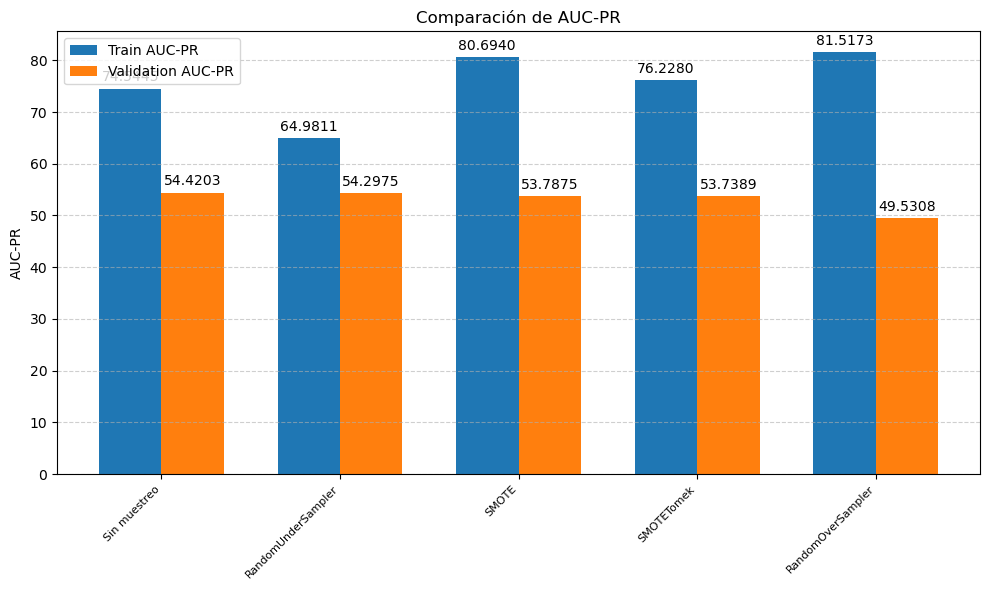

In [45]:
# Lista de técnicas de muestreo
muestreos = [
    None,
    RandomOverSampler(random_state=1234),
    SMOTE(random_state=1234),
    RandomUnderSampler(random_state=1234),
    SMOTEENN(random_state=1234),
    SMOTETomek(random_state=1234)
]

resultados = []
for muestreo in muestreos:
    # Definimos el preprocesador de variables categóricas
    categorical_preprocessor = Pipeline(steps=[
        ('encoder', ce.CountEncoder())
    ])

    # Preprocesador para variables numéricas transformadas
    numerical_trans_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('transformer', QuantileTransformer())
    ])

    # Preprocesador para variables numéricas no transformadas
    numerical_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('out_detector', OutlierDetecion_treatment_IQR(k=1)) 
    ])

    # Creamos el preprocesador final
    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
            ('numerical_trans_preprocessor', numerical_trans_preprocessor, variables_numericas_trans),
            ('numerical_preprocessor', numerical_preprocessor, variables_numericas_no_trans)
        ]
    )

    # Creamos los pasos de la pipeline
    steps = [('var_generator', GeneradorVariables()),
             ("preprocessor", preprocessor),
             ('corr_filter', corr_selection(umbral=0.8)),
             ('sfs', SequentialFeatureSelector(
                 estimator=clf_base,
                 n_features_to_select=10,
                 direction='forward',
                 scoring=score_PR,
                 cv=cv,
                 n_jobs=-1)
                 )
            ]
    
    if muestreo is not None:
        nombre_tecnica = muestreo.__class__.__name__
        steps.append(('muestreo', muestreo))
    else:
        nombre_tecnica = "Sin muestreo"

    steps.append(("clf", clf_base))
    
    modelo = Pipeline(steps)

    _, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)
    
    resultados.append({"nombre_prueba" : nombre_tecnica,
                  "train_auc_pr" : train_auc_pr,
                  "val_auc_pr" : val_auc_pr})
    
comparar_resultados(resultados)

Por la misma razón que motivó la falta de mejora al aplicar técnicas de eliminación de ruido, el balanceo del dataset tampoco ha producido una mejora en el rendimiento. 

Por tanto, no se aplicará ninguna técnica de remuestreo ni métodos híbridos en el flujo de trabajo.

## 5. Elección del modelo

En este apartado se compararon dos modelos de aprendizaje automático: **K-Nearest Neighbors (KNN)** y **árbol de decisión (DecisionTreeClassifier)**, con el objetivo de determinar cuál se ajusta mejor al problema de predicción de deserción de clientes (*churn*).

Ambos modelos fueron evaluados utilizando un **flujo de preprocesamiento común**, diseñado para optimizar el rendimiento especialmente en situaciones con datos desbalanceados. Este flujo incluye:

- **Generación de variables adicionales** mediante ingeniería de características personalizada.
- **Codificación de variables categóricas** con `CountEncoder`.
- **Tratamiento de valores ausentes** en variables numéricas con imputación por la media.
- **Transformación de variables numéricas** mediante `QuantileTransformer`, para una mejor distribución.
- **Detección y tratamiento de outliers** en variables no transformadas, empleando el método del rango intercuartíl (IQR).
- **Eliminación de variables altamente correlacionadas**, aplicando un umbral de correlación del 0,8.
- **Selección secuencial de características (SFS)** con validación cruzada estratificada, para quedarnos con las 10 variables más informativas según la métrica AUC-PR.
- **Evaluación del rendimiento** con la métrica **AUC-PR**, adecuada para contextos de clases desbalanceadas, tanto en el conjunto de entrenamiento como en el de validación.

Este enfoque garantiza una comparación justa entre ambos modelos, asegurando que las diferencias observadas en el rendimiento se deben a la capacidad predictiva de los clasificadores y no al preprocesamiento.


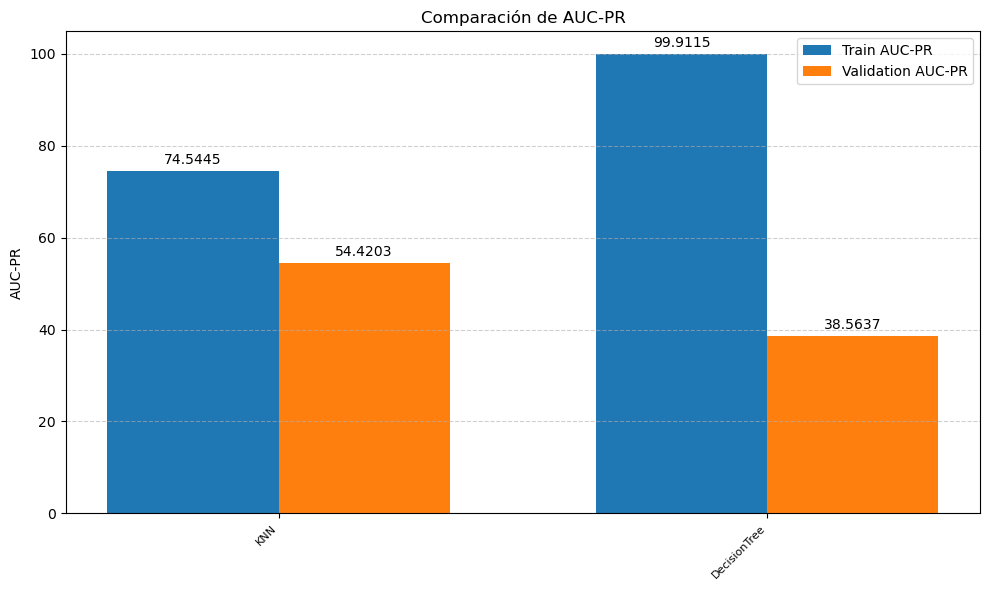

In [46]:
clasificadores = [
    ("KNN", KNeighborsClassifier()),
    ("DecisionTree", DecisionTreeClassifier(random_state=1234))
]

resultados = []
for clasificador_nombre, clasificador in clasificadores:
    # Definimos los pasos de la pipeline
    # Definimos el preprocesador de variables categóricas
    categorical_preprocessor = Pipeline(steps=[
        ('encoder', ce.CountEncoder())
    ])

    # Preprocesador para variables numéricas transformadas
    numerical_trans_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('transformer', QuantileTransformer())
    ])

    # Preprocesador para variables numéricas no transformadas
    numerical_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('out_detector', OutlierDetecion_treatment_IQR(k=1)) 
    ])

    # Creamos el preprocesador final
    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
            ('numerical_trans_preprocessor', numerical_trans_preprocessor, variables_numericas_trans),
            ('numerical_preprocessor', numerical_preprocessor, variables_numericas_no_trans)
        ]
    )

    # Creamos los pasos de la pipeline
    steps = [('var_generator', GeneradorVariables()),
             ("preprocessor", preprocessor),
             ('corr_filter', corr_selection(umbral=0.8)),
             ('sfs', SequentialFeatureSelector(
                 estimator=clf_base,
                 n_features_to_select=10,
                 direction='forward',
                 scoring=score_PR,
                 cv=cv,
                 n_jobs=-1)
                 ),
             ("clf", clasificador)
            ]
    
    modelo = Pipeline(steps)

    modelo, train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val1, y_val1)
    
    resultados.append({"nombre_prueba" : clasificador_nombre,
                  "train_auc_pr" : train_auc_pr,
                  "val_auc_pr" : val_auc_pr})
    
comparar_resultados(resultados)

En la evaluación comparativa, el modelo **K-Nearest Neighbors (KNN)** obtuvo un **AUC-PR del 56,86 % en el conjunto de validación**, mostrando un rendimiento más consistente y equilibrado que el árbol de decisión entre el entrenamiento y la validación.

Por el contrario, el **árbol de decisión** alcanzó un AUC-PR del **99,94 % en entrenamiento**, pero su rendimiento se redujo hasta el **39,25 % en validación**, lo que evidencia un claro problema de **sobreajuste (overfitting)**. Esta diferencia sugiere que el modelo ha memorizado los datos de entrenamiento, perdiendo capacidad para generalizar sobre datos nuevos.

Es importante destacar que el **preprocesamiento fue optimizado específicamente para KNN**, lo que también pudo favorecer su mejor comportamiento.

Dado su **mayor equilibrio entre rendimiento en entrenamiento y validación**, se seleccionó **KNN como modelo final**, al mostrar una mejor **capacidad de generalización**.

## 6. Ajuste de Hiperparámetros del Modelo

En esta sección se llevó a cabo el ajuste fino del modelo **K-Nearest Neighbors (KNN)** utilizando `GridSearchCV`, con el objetivo de optimizar su rendimiento en la predicción de clientes que abandonan el servicio.

El ajuste se realizó sobre un `Pipeline` completo que incluye generación y transformación de variables, eliminación de atributos altamente correlacionados, selección secuencial de características y, finalmente, el clasificador. Por ello, se evaluaron de forma conjunta los siguientes hiperparámetros:

- `clf__n_neighbors`: número de vecinos considerados (valores evaluados: 3, 5, 7, 9)
- `clf__weights`: tipo de ponderación de los vecinos (`uniform` o `distance`)
- `clf__metric`: métrica de distancia utilizada (`euclidean` o `manhattan`)
- `sfs__n_features_to_select`: número de variables seleccionadas por el método secuencial (valores: 5, 10, 15)
- `corr_filter__umbral`: umbral de correlación para filtrar variables altamente correlacionadas (valores: 0.7, 0.8, 0.9)

Para la validación se utilizó validación cruzada con `StratifiedKFold` (k=5), garantizando que cada combinación de hiperparámetros fuese evaluada de forma robusta. La métrica empleada fue `average_precision` (AUC-PR), por su idoneidad en contextos con clases desbalanceadas.

El mejor modelo obtenido será empleado en las siguientes etapas del análisis.

In [47]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def tunearClasificador(estimator, param_grid, scorer, cv, X, y, n_iter=10):
    # Realizar la búsqueda aleatoria de hiperparámetros
    random_search = RandomizedSearchCV(estimator, param_distributions=param_grid, 
                                       scoring=scorer, cv=cv, n_iter=n_iter, 
                                       verbose=3, random_state=1234)
    random_search.fit(X, y)

    # Mostrar los resultados de todas las combinaciones de los hiperparámetros
    print("Resultados de la búsqueda aleatoria:")
    for mean_score, params in zip(random_search.cv_results_['mean_test_score'], 
                                  random_search.cv_results_['params']):
        print(f"Puntuación: {mean_score:.4f} para los parámetros: {params}")

    # Devolver el mejor modelo, la mejor puntuación y los mejores parámetros
    return random_search.best_estimator_, random_search.best_score_, random_search.best_params_


In [48]:
# Param grid con las combinaciones aleatorias
param_grid = {
    # KNN (estimador final)
    'clf__n_neighbors': list(range(3, 61, 2)),  # K desde 3 hasta 50 (números impares)
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan'],
    
    # Filtro de correlación
    'corr_filter__umbral': np.linspace(0.6, 0.9, num=4).tolist(),  # umbral de 0.6 hasta 0.9
    
    # Selección secuencial de características
    'sfs__n_features_to_select': list(range(5, 16))  # Enteros de 5 hasta 15 (inclusive)
}

# Creamos los pasos del modelo
steps = [
    ('var_generator', GeneradorVariables()),
    ("preprocessor", preprocessor),
    ('corr_filter', corr_selection(umbral=0.8)),
    ('sfs', SequentialFeatureSelector(
        estimator=clf_base,
        n_features_to_select=10,
        direction='forward',
        scoring=score_PR,
        cv=cv,
        n_jobs=-1
    )),
    ("clf", KNeighborsClassifier())
]

# Creamos el modelo
p_KNN = Pipeline(steps)

# Concatenamos X_train y X_val1
X_combined = pd.concat([X_train, X_val1], axis=0)
y_combined = pd.concat([y_train, y_val1], axis=0)

# Realizamos la búsqueda de hiperparámetros con RandomizedSearchCV
best_KNN, best_val, best_hipPar = tunearClasificador(p_KNN, param_grid, scorer=score_PR, cv=cv, X=X_combined, y=y_combined, n_iter=40)

# Mostrar el mejor modelo y parámetros
print(f"Mejor modelo: {best_KNN}")
print(f"Mejor puntuación (AUC-PR): {best_val:.4f}")
print(f"Mejores parámetros: {best_hipPar}")


Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV 1/2] END clf__metric=manhattan, clf__n_neighbors=9, clf__weights=distance, corr_filter__umbral=0.6, sfs__n_features_to_select=8;, score=0.533 total time=   1.3s
[CV 2/2] END clf__metric=manhattan, clf__n_neighbors=9, clf__weights=distance, corr_filter__umbral=0.6, sfs__n_features_to_select=8;, score=0.552 total time=   1.4s
[CV 1/2] END clf__metric=euclidean, clf__n_neighbors=19, clf__weights=uniform, corr_filter__umbral=0.7, sfs__n_features_to_select=13;, score=nan total time=   0.3s
[CV 2/2] END clf__metric=euclidean, clf__n_neighbors=19, clf__weights=uniform, corr_filter__umbral=0.7, sfs__n_features_to_select=13;, score=0.561 total time=   2.0s
[CV 1/2] END clf__metric=euclidean, clf__n_neighbors=31, clf__weights=distance, corr_filter__umbral=0.9, sfs__n_features_to_select=14;, score=0.581 total time=   3.4s
[CV 2/2] END clf__metric=euclidean, clf__n_neighbors=31, clf__weights=distance, corr_filter__umbral=0.9, sfs__n_

#### Mejores hiperparámetros encontrados:

- `sfs__n_features_to_select`: 11
- `corr_filter__umbral`: 0.8
- `clf__weights`: 'uniform'
- `clf__n_neighbors`: 33
- `clf__metric`: 'manhattan'

#### Mejor AUC-PR (validación cruzada): 61.89%

Esto representa una mejora respecto al modelo inicial sin tuning (que había obtenido un AUC-PR de 56.86% en validación). El modelo ajustado muestra una mejor capacidad de generalización, logrando un mayor equilibrio entre la precisión y la capacidad de identificar correctamente los casos positivos, lo que mejora la efectividad en la predicción del churn.

## 7. Elección del umbral:

Por defecto, los clasificadores suelen predecir la clase positiva cuando la probabilidad de pertenecer a esa clase es superior a 0.5. Sin embargo, en el contexto de la predicción de abandono de clientes (churn), donde la correcta identificación de los clientes con mayor riesgo de abandonar es crucial, este umbral predeterminado puede no ser el más adecuado. Ajustar este umbral permite mejorar métricas como el **F1-score**, que es especialmente relevante cuando se enfrenta a problemas de clases desbalanceadas, como ocurre en el churn. Ajustar el umbral permite una mejor detección de los casos positivos (clientes que probablemente abandonarán), optimizando así la efectividad del modelo en términos de precisión y recall.

Para poder modificar el umbral de decisión, lo primero que tenemos que hacer es crear una función que devuelva las clases predichas en base a un umbral determinado. Es decir, si la probabilidad de que un ejemplo sea de la clase positiva es mayor o igual que el umbral se devolverá 1 y en caso contrario se devolverá 0.

In [49]:
# Función para realizar la clasificación en base a un umbral y las probabilidades de que los ejemplos sean de la clase positiva
def clasificacion_umbral(probs_clase_positiva, umbral=0.5):
    predicciones = np.copy(probs_clase_positiva)
    predicciones[predicciones >= umbral] = 1
    predicciones[predicciones < umbral] = 0

    return predicciones

Finalmente vamos a crear una función en la que:
* Se obtienen los posibles umbrales mediante los ejemplos de entrenamiento.
* Se evalúa la calidad de cada umbral con los ejemplos de validación de acuerdo al Fscore.
    * Se escoge el mejor que es lo que devuelve la función.

In [50]:
# función para calcular el mejor umbral de un modelo (model) de acuerdo al Fscore
    # y los ejemplos de train (X_train, y_train) y validación (X_val, y_val)
def calcular_mejor_umbral_fscore(model, X_train, y_train, X_val, y_val):    
    # predecimos las probabilidades de predecir cada ejemplo de train y de validación en la clase positiva
    model_probs = model.predict_proba(X_train)[:, 1]
    model_probs_val = model.predict_proba(X_val)[:, 1]
    
    # calculamos todos los pares de puntos (recall, precision) y sus umbrales (método precision_recall_curve)
    model_precision, model_recall, umbrales = metrics.precision_recall_curve(y_train, model_probs)
    # Evaluamos el Fscore (método f1_score) de cada umbral 
    rendimiento_umbrales = []
    for umbral in umbrales:
        predicciones = clasificacion_umbral(model_probs_val, umbral)
        f_score = metrics.f1_score(y_val, predicciones) * 100
        rendimiento_umbrales.append(f_score)

    # Se consigue el índice del umbral que da mayor rendimiento
    indiceMejorUmbral = np.argmax(np.array(rendimiento_umbrales))
    # Se consigue el valor del mejor umbral
    mejorUmbral = umbrales[indiceMejorUmbral]
    print('Mejor umbral={:.3f}, Fscore en validacion={:.2f}'.format(mejorUmbral, rendimiento_umbrales[indiceMejorUmbral]))
    # Se devuelve el mejor umbral
    return mejorUmbral

Vamos a definir una función que obtenga el Fscore obtenido en unos datos para un clasificador y un umbral de decisión concreto.

In [51]:
# función para evaluar el mejor umbral (umbral) de un modelo (model) de acuerdo al Fscore en tanto por 100
    # en unos ejemplos (X, y)
def evaluar_mejor_umbral_fscore(model, umbral, X, y):
    # Evaluamos la calidad del mejor umbral con los ejemplos
    model_probs = model.predict_proba(X)[:, 1]
    predicciones = clasificacion_umbral(model_probs, umbral)
    fscore = metrics.f1_score(y, predicciones) * 100
    return fscore

def evaluar_mejor_umbral_recall(model, umbral, X, y):
    # Evaluamos la calidad del mejor umbral con los ejemplos
    model_probs = model.predict_proba(X)[:, 1]
    predicciones = clasificacion_umbral(model_probs, umbral)
    
    # Calculamos el recall de la clase 1
    recall = metrics.recall_score(y, predicciones) * 100
    return recall

def evaluar_mejor_umbral_precision(model, umbral, X, y):
    # Evaluamos la calidad del mejor umbral con los ejemplos
    model_probs = model.predict_proba(X)[:, 1]
    predicciones = clasificacion_umbral(model_probs, umbral)
    
    # Calculamos la precisión de la clase 1
    precision = metrics.precision_score(y, predicciones) * 100
    return precision

También definiremos una función que muestre la relación entre precisión, recall y f1-score.

In [52]:
def comparar_metricas(modelo, X_train, y_train, X_val, y_val):
    mejorUmbral = calcular_mejor_umbral_fscore(modelo, X_train, y_train, X_val, y_val)
    # Realizamos la predicción sobre X_train
    y_train_pred = best_KNN.predict_proba(X_train)[:, 1]
    # Calcular precisión, recall y umbrales
    _, _, thresholds = metrics.precision_recall_curve(y_train, y_train_pred)

    precisiones = np.array([evaluar_mejor_umbral_precision(best_KNN, threshold, X_val, y_val) for threshold in thresholds])
    recalls = np.array([evaluar_mejor_umbral_recall(best_KNN, threshold, X_val, y_val) for threshold in thresholds])
    f1_scores = np.array([evaluar_mejor_umbral_fscore(best_KNN, threshold, X_val, y_val) for threshold in thresholds])

    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precisiones, label='Precisión')
    plt.plot(thresholds, recalls, label='Recall')
    plt.plot(thresholds, f1_scores, label='F1-score', linestyle='--')
    plt.axvline(x=mejorUmbral, color='gray', linestyle=':', label=f'Umbral óptimo = {mejorUmbral:.2f}')
    plt.xlabel('Umbral de decisión')
    plt.ylabel('Métrica')
    plt.title('Precisión, Recall y F1-score según umbral')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Finalmente, vamos a utilizar las funciones anteriores para realizar el proceso de selección del umbral y aplicarlo para obtener su Fscore en los datos de test. 

Mejor umbral=0.273, Fscore en validacion=63.16


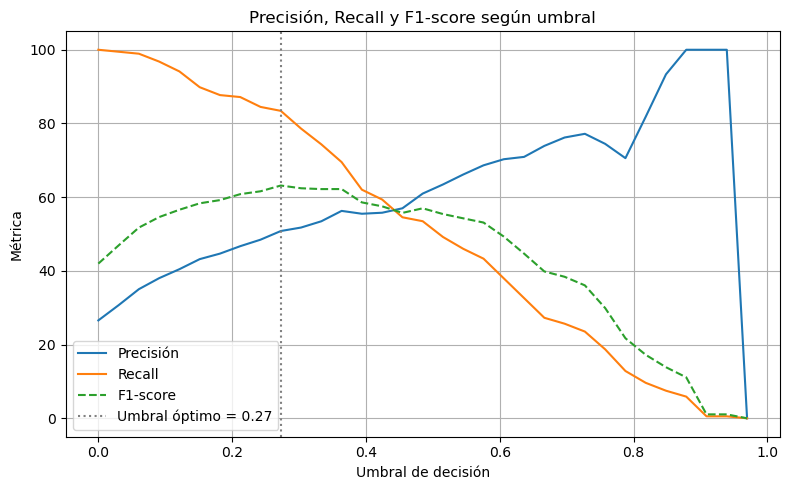

In [53]:
comparar_metricas(best_KNN, X_combined, y_combined, X_val2, y_val2)

- El mejor umbral encontrado para la clasificación fue 0.273.
- Con este umbral, se logró un F1-score máximo de 63.16, lo que indica un buen equilibrio entre precisión y recall, optimizando la detección de clientes que abandonarán.
- Este umbral fue preferido sobre el estándar de 0.5, ya que permite una mejor identificación de los clientes en riesgo de churn, lo cual es fundamental para las estrategias de retención y toma de decisiones dentro del negocio.

Este umbral ajustado será utilizado en el modelo final, priorizando la detección precisa de clientes propensos a abandonar el servicio, en lugar de enfocarse exclusivamente en la precisión de las predicciones.

## 8. Interpretabilidad del modelo
Como el modelo final es un K-Nearest Neighbors (KNN), se utilizó SHAP con KernelExplainer para generar explicaciones locales, tal como se enseñó en clase.

Se replicó el preprocesamiento del pipeline y se entrenó un modelo KNN sobre datos ya transformados.

Se seleccionó un cliente de validación, con predicción de churn = 0.78.

El gráfico force_plot muestra cómo cada variable influyó en la predicción.

In [54]:
import shap
import numpy as np

# Seleccionamos un cliente de validación
i = 5
ejemplo = X_val.iloc[i:i+1]  # Asegúrate de que es un DataFrame con una sola fila

# Creamos una función para hacer las predicciones del modelo con el pipeline
def model_predict(X):
    return best_KNN.predict_proba(X)[:, 1]  # Solo la probabilidad de la clase positiva (1)

# Creamos el KernelExplainer (modelo agnóstico)
explainer = shap.KernelExplainer(model_predict, shap.sample(X_val, 100))

# Calculamos los SHAP values para el ejemplo seleccionado
shap_values = explainer.shap_values(ejemplo)

# Imprimir el tipo y forma de los shap_values
print(type(shap_values))
print(np.array(shap_values).shape)

# Visualizamos con force_plot
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], ejemplo)


Provided model function fails when applied to the provided data set.


KeyError: "None of [Index(['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',\n       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],\n      dtype='object')] are in the [columns]"

## 
En el gráfico:

Variables en rojo empujan la predicción hacia churn.

Variables en azul empujan hacia no churn.

El valor base era ~0.27 y terminó en 0.78 por el efecto combinado de las variables.

Esta interpretación local permite entender cómo el modelo toma decisiones para casos individuales, entregando transparencia.

In [ ]:
X_val

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
0810-BDHAW,Female,0,Yes,Yes,24,Yes,Yes,DSL,Yes,Yes,No,No,Yes,Yes,One year,No,Electronic check,78.40,1832.40
1335-MXCSE,Male,0,Yes,Yes,55,Yes,No,DSL,No,No,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),55.25,3119.90
0228-MAUWC,Male,0,No,No,19,Yes,Yes,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,59.55,1144.60
1098-TDVUQ,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.25,19.25
0017-DINOC,Male,0,No,No,54,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,Two year,No,Credit card (automatic),45.20,2460.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281-PKKZE,Female,0,Yes,No,46,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,43.95,2007.85
2612-PHGOX,Male,0,Yes,No,64,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),76.10,4818.80
3002-WQZWT,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.20,1993.25


In [ ]:
best_KNN.predict_proba(X_val)[:, 1]

array([0.12121212, 0.06060606, 0.24242424, ..., 0.45454545, 0.54545455,
       0.48484848])

In [ ]:
# 1. Aplica solo los pasos anteriores al clasificador (sin 'clf')
X_transformed = best_KNN[:-1].transform(X_val)

# 2. Extrae el clasificador final
modelo_knn = best_KNN.named_steps["clf"]

# 3. Crea el explainer para el modelo
explainer = shap.Explainer(modelo_knn.predict, X_transformed)

# 4. Explica el ejemplo
i = 5
shap_values = explainer(X_transformed[[i]])

# 5. Visualiza
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values, X_transformed[[i]])



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
import shap
import numpy as np

pipeline_features = Pipeline(best_KNN.steps[:-1]) 
clf = best_KNN.named_steps['clf'] 

# Paso 3: Transformar los datos con la parte de la pipeline que genera y selecciona features
X_trans = pipeline_features.transform(X_train)
indice_ejemplo_a_predecir = 5
ejemplo_a_predecir = X_trans[indice_ejemplo_a_predecir, :]

# Paso 5: Crear el KernelExplainer
kernel_explainer = shap.KernelExplainer(clf.predict_proba, X_trans)
kernel_shap_values = kernel_explainer.shap_values(ejemplo_a_predecir)

shap.force_plot(kernel_explainer.expected_value[1], kernel_shap_values[:, 1], ejemplo_a_predecir)



Using 4930 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


: 

: 

In [ ]:
print(type(shap_values))
print(len(shap_values))


<class 'numpy.ndarray'>
1
